# 1. Pandas Basic

## import

In [1]:
import numpy as np
import pandas as pd

## 생성

In [2]:
order_url = 'https://bit.ly/dsa-01-order'
order = pd.read_csv(order_url)
order

,id,user_id,product_id,date,price,address,state
0,1,3,9,2017-01-01,500,Seoul,confirmed
1,2,1,7,2017-01-03,700,Seoul,confirmed
2,3,3,8,2017-01-03,900,Daejeon,confirmed
3,4,4,2,2017-01-07,500,NaN,canceled
4,5,7,3,2017-01-09,700,Incheon,confirmed
5,6,5,7,2017-01-09,600,Busan,canceled
6,7,2,5,2017-01-10,200,NaN,canceled


In [3]:
order = order.set_index('id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled


In [4]:
print(type(order.index))
order.index

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='id')

In [5]:
print(type(order.columns))
order.columns

<class 'pandas.core.indexes.base.Index'>


Index(['user_id', 'product_id', 'date', 'price', 'address', 'state'], dtype='object')

In [6]:
print(type(order.values))
order.values

<class 'numpy.ndarray'>


array([[3, 9, '2017-01-01', 500, 'Seoul', 'confirmed'],
       [1, 7, '2017-01-03', 700, 'Seoul', 'confirmed'],
       [3, 8, '2017-01-03', 900, 'Daejeon', 'confirmed'],
       [4, 2, '2017-01-07', 500, nan, 'canceled'],
       [7, 3, '2017-01-09', 700, 'Incheon', 'confirmed'],
       [5, 7, '2017-01-09', 600, 'Busan', 'canceled'],
       [2, 5, '2017-01-10', 200, nan, 'canceled']], dtype=object)

In [7]:
order.columns = ['user_id', 'product_id', 'date', 'amount', 'address', 'result']
order

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled


## 기본 연산

In [8]:
print(order['amount'].mean())
print(order['amount'].min())
print(order['amount'].max())
print(order['amount'].describe())                 

585.7142857142857
200
900
count      7.000000
mean     585.714286
std      219.306266
min      200.000000
25%      500.000000
50%      600.000000
75%      700.000000
max      900.000000
Name: amount, dtype: float64


In [9]:
order['result'].unique()

array(['confirmed', 'canceled'], dtype=object)

In [10]:
order['result'].value_counts()

confirmed    4
canceled     3
Name: result, dtype: int64

In [11]:
# 전체 중에서의 비율
order['result'].value_counts(normalize=True)

confirmed    0.571429
canceled     0.428571
Name: result, dtype: float64

## value 변경

In [12]:
order['result'] = order['result'].replace('confirmed', 'confirm').replace('canceled', 'cancel')
order

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
4,4,2,2017-01-07,500,NaN,cancel
5,7,3,2017-01-09,700,Incheon,confirm
6,5,7,2017-01-09,600,Busan,cancel
7,2,5,2017-01-10,200,NaN,cancel


## datetime으로 변경

In [13]:
order['date'] = pd.to_datetime(order['date'])
order['date'].dt.year

id
1    2017
2    2017
3    2017
4    2017
5    2017
6    2017
7    2017
Name: date, dtype: int64

## 행, 열 검색

In [14]:
order['date']

id
1   2017-01-01
2   2017-01-03
3   2017-01-03
4   2017-01-07
5   2017-01-09
6   2017-01-09
7   2017-01-10
Name: date, dtype: datetime64[ns]

In [15]:
order[['user_id', 'date']]

,user_id,date
id,,
1,3,2017-01-01
2,1,2017-01-03
3,3,2017-01-03
4,4,2017-01-07
5,7,2017-01-09
6,5,2017-01-09
7,2,2017-01-10


In [16]:
col = ['user_id', 'date', 'amount']
order[col]

,user_id,date,amount
id,,,
1,3,2017-01-01,500
2,1,2017-01-03,700
3,3,2017-01-03,900
4,4,2017-01-07,500
5,7,2017-01-09,700
6,5,2017-01-09,600
7,2,2017-01-10,200


In [17]:
order.loc[4]

user_id                         4
product_id                      2
date          2017-01-07 00:00:00
amount                        500
address                       NaN
result                     cancel
Name: 4, dtype: object

In [18]:
order.loc[[1, 3, 7]]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
7,2,5,2017-01-10,200,NaN,cancel


In [19]:
order.loc[1, 'date']

Timestamp('2017-01-01 00:00:00')

In [20]:
order.loc[[1, 3, 7], 'date']

id
1   2017-01-01
3   2017-01-03
7   2017-01-10
Name: date, dtype: datetime64[ns]

## 색인

In [21]:
order['date'] == '2017-01-03'

id
1    False
2     True
3     True
4    False
5    False
6    False
7    False
Name: date, dtype: bool

In [22]:
order[order['date'] == '2017-01-03']

,user_id,product_id,date,amount,address,result
id,,,,,,
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm


In [23]:
order[order['date'] != '2017-01-03']

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
4,4,2,2017-01-07,500,NaN,cancel
5,7,3,2017-01-09,700,Incheon,confirm
6,5,7,2017-01-09,600,Busan,cancel
7,2,5,2017-01-10,200,NaN,cancel


In [24]:
order[order['amount'] >= 500]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
4,4,2,2017-01-07,500,NaN,cancel
5,7,3,2017-01-09,700,Incheon,confirm
6,5,7,2017-01-09,600,Busan,cancel


In [25]:
date_candidates = ['2017-01-01', '2017-01-05', '2017-01-09']
order[order['date'].isin(date_candidates)]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
5,7,3,2017-01-09,700,Incheon,confirm
6,5,7,2017-01-09,600,Busan,cancel


In [26]:
order[order['address'].isnull()]

,user_id,product_id,date,amount,address,result
id,,,,,,
4,4,2,2017-01-07,500,NaN,cancel
7,2,5,2017-01-10,200,NaN,cancel


In [27]:
order[~order['address'].isnull()]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
5,7,3,2017-01-09,700,Incheon,confirm
6,5,7,2017-01-09,600,Busan,cancel


In [28]:
order[order['address'].notnull()]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
5,7,3,2017-01-09,700,Incheon,confirm
6,5,7,2017-01-09,600,Busan,cancel


In [29]:
order[(order['amount'] >= 500) & (order['result'] == 'confirm')]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
5,7,3,2017-01-09,700,Incheon,confirm


In [30]:
high = (order['amount'] >= 500)
confirm = (order['result'] == 'confirm')

order[high & confirm]

,user_id,product_id,date,amount,address,result
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm
2,1,7,2017-01-03,700,Seoul,confirm
3,3,8,2017-01-03,900,Daejeon,confirm
5,7,3,2017-01-09,700,Incheon,confirm


## 색인 후 검색

In [31]:
order.loc[order['date'] == '2017-01-09', 'amount']

id
5    700
6    600
Name: amount, dtype: int64

In [32]:
order.loc[order['date'] == '2017-01-09', ['date', 'amount']]

,date,amount
id,,
5,2017-01-09,700
6,2017-01-09,600


## 컬럼 추가 & 수정

In [33]:
order['card-holder'] = 'KB'
order

,user_id,product_id,date,amount,address,result,card-holder
id,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB
2,1,7,2017-01-03,700,Seoul,confirm,KB
3,3,8,2017-01-03,900,Daejeon,confirm,KB
4,4,2,2017-01-07,500,NaN,cancel,KB
5,7,3,2017-01-09,700,Incheon,confirm,KB
6,5,7,2017-01-09,600,Busan,cancel,KB
7,2,5,2017-01-10,200,NaN,cancel,KB


In [34]:
order['order'] = [1,2,3,4,5,6,7]
order

,user_id,product_id,date,amount,address,result,card-holder,order
id,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1
2,1,7,2017-01-03,700,Seoul,confirm,KB,2
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3
4,4,2,2017-01-07,500,NaN,cancel,KB,4
5,7,3,2017-01-09,700,Incheon,confirm,KB,5
6,5,7,2017-01-09,600,Busan,cancel,KB,6
7,2,5,2017-01-10,200,NaN,cancel,KB,7


In [35]:
order['VIP'] = order['amount'] >= 500
order

,user_id,product_id,date,amount,address,result,card-holder,order,VIP
id,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3,True
4,4,2,2017-01-07,500,NaN,cancel,KB,4,True
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True
6,5,7,2017-01-09,600,Busan,cancel,KB,6,True
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False


In [36]:
order['VIP'] = (order['amount'] >= 500) & (order['result'] == 'confirm')
order

,user_id,product_id,date,amount,address,result,card-holder,order,VIP
id,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3,True
4,4,2,2017-01-07,500,NaN,cancel,KB,4,False
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True
6,5,7,2017-01-09,600,Busan,cancel,KB,6,False
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False


In [37]:
order.loc[order['amount'] >= 500, 'status'] = 'VIP'
order.loc[order['amount'] < 500, 'status'] = 'None-VIP'
order

,user_id,product_id,date,amount,address,result,card-holder,order,VIP,status
id,,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True,VIP
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True,VIP
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3,True,VIP
4,4,2,2017-01-07,500,NaN,cancel,KB,4,False,VIP
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True,VIP
6,5,7,2017-01-09,600,Busan,cancel,KB,6,False,VIP
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False,None-VIP


## 삭제

In [38]:
order.drop('status', axis='columns')

,user_id,product_id,date,amount,address,result,card-holder,order,VIP
id,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3,True
4,4,2,2017-01-07,500,NaN,cancel,KB,4,False
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True
6,5,7,2017-01-09,600,Busan,cancel,KB,6,False
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False


In [39]:
order.drop(['status', 'VIP'], axis=1)

,user_id,product_id,date,amount,address,result,card-holder,order
id,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1
2,1,7,2017-01-03,700,Seoul,confirm,KB,2
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3
4,4,2,2017-01-07,500,NaN,cancel,KB,4
5,7,3,2017-01-09,700,Incheon,confirm,KB,5
6,5,7,2017-01-09,600,Busan,cancel,KB,6
7,2,5,2017-01-10,200,NaN,cancel,KB,7


In [40]:
order.drop(3, axis='rows')

,user_id,product_id,date,amount,address,result,card-holder,order,VIP,status
id,,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True,VIP
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True,VIP
4,4,2,2017-01-07,500,NaN,cancel,KB,4,False,VIP
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True,VIP
6,5,7,2017-01-09,600,Busan,cancel,KB,6,False,VIP
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False,None-VIP


## apply

In [41]:
def is_vip(amount):
    if amount >= 500:
        return 'VIP'
    else:
        return 'None-VIP'
    
order['vip'] = order['amount'].apply(is_vip)
order

,user_id,product_id,date,amount,address,result,card-holder,order,VIP,status,vip
id,,,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True,VIP,VIP
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True,VIP,VIP
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3,True,VIP,VIP
4,4,2,2017-01-07,500,NaN,cancel,KB,4,False,VIP,VIP
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True,VIP,VIP
6,5,7,2017-01-09,600,Busan,cancel,KB,6,False,VIP,VIP
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False,None-VIP,None-VIP


In [42]:
def is_vip(row):
    amount = row['amount']
    result = row['result']
    
    if amount >= 500 and result == 'confirm':
        return 'VIP'
    else:
        return 'None-VIP'
    
order['status'] = order.apply(is_vip, axis='columns')
order

,user_id,product_id,date,amount,address,result,card-holder,order,VIP,status,vip
id,,,,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirm,KB,1,True,VIP,VIP
2,1,7,2017-01-03,700,Seoul,confirm,KB,2,True,VIP,VIP
3,3,8,2017-01-03,900,Daejeon,confirm,KB,3,True,VIP,VIP
4,4,2,2017-01-07,500,NaN,cancel,KB,4,False,None-VIP,VIP
5,7,3,2017-01-09,700,Incheon,confirm,KB,5,True,VIP,VIP
6,5,7,2017-01-09,600,Busan,cancel,KB,6,False,None-VIP,VIP
7,2,5,2017-01-10,200,NaN,cancel,KB,7,False,None-VIP,None-VIP


# 

# 2. Advanced

## 정렬

In [43]:
url = 'https://bit.ly/dsa-01-order'

# order = pd.read_csv(url, index_col='id')
order = pd.read_csv(url)
order = order.set_index('id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled


In [44]:
order.sort_index()
# order.sort_index(ascending=False)

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled


In [45]:
order.sort_values(by = 'price')

,user_id,product_id,date,price,address,state
id,,,,,,
7,2,5,2017-01-10,200,NaN,canceled
1,3,9,2017-01-01,500,Seoul,confirmed
4,4,2,2017-01-07,500,NaN,canceled
6,5,7,2017-01-09,600,Busan,canceled
2,1,7,2017-01-03,700,Seoul,confirmed
5,7,3,2017-01-09,700,Incheon,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed


In [46]:
order.sort_values(by=['date','price'])

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
6,5,7,2017-01-09,600,Busan,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
7,2,5,2017-01-10,200,NaN,canceled


In [47]:
# 컬럼마다 오름차순 내림차순 다르게 설정 가능
order.sort_values(by=['date','price'], ascending=[True, False])

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled


## pivot table

In [48]:
pd.pivot_table(order, index = 'state', values='price')

,price
state,
canceled,433.333333
confirmed,700.000000


In [49]:
pd.pivot_table(order, index = 'address', values='price')

,price
address,
Busan,600
Daejeon,900
Incheon,700
Seoul,600


In [50]:
pd.pivot_table(order, index = 'state', values='price', aggfunc='sum') # 누적치

,price
state,
canceled,1300
confirmed,2800


In [51]:
pd.pivot_table(order, index = 'state', values='price',aggfunc=['mean','sum'])

,mean,sum
,price,price
state,,
canceled,433.333333,1300
confirmed,700.000000,2800


In [52]:
import numpy as np
pd.pivot_table(order, index = 'state', values='price',aggfunc=[np.mean, np.sum])

,mean,sum
,price,price
state,,
canceled,433.333333,1300
confirmed,700.000000,2800


In [53]:
pd.pivot_table(order, index = ['date','state'], values='price')

price
date       state           
2017-01-01 confirmed    500
2017-01-03 confirmed    800
2017-01-07 canceled     500
2017-01-09 canceled     600
           confirmed    700
2017-01-10 canceled     200

## group by

* 통계연산하고 결과를 보고 싶을 때 pivot table
* 그외, 추가 계산이 필요할 때(속도도 빠름) groupby

In [54]:
order['price'].mean()

585.7142857142857

In [55]:
order.groupby('state')['price'].mean()

state
canceled     433.333333
confirmed    700.000000
Name: price, dtype: float64

In [56]:
order.groupby('state')['price'].sum()

state
canceled     1300
confirmed    2800
Name: price, dtype: int64

In [57]:
order.groupby(['date', 'state'])['price'].mean()

date        state    
2017-01-01  confirmed    500
2017-01-03  confirmed    800
2017-01-07  canceled     500
2017-01-09  canceled     600
            confirmed    700
2017-01-10  canceled     200
Name: price, dtype: int64

In [58]:
table = pd.pivot_table(order, index = ['date','state'], values='price')
table.sort_values(by='price')

price
date       state           
2017-01-10 canceled     200
2017-01-01 confirmed    500
2017-01-07 canceled     500
2017-01-09 canceled     600
           confirmed    700
2017-01-03 confirmed    800

## 여러 개의 데이터를 하나로 합치기

### concat(concatenate)

In [59]:
url = 'https://bit.ly/dsa-02-order-201701'
order201701 = pd.read_csv(url, index_col = 'id')
order201701

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled


In [60]:
url = 'https://bit.ly/dsa-02-order-201702'
order201702 = pd.read_csv(url, index_col = 'id')
order201702

,user_id,product_id,date,price,address,state
id,,,,,,
8,1,3,2017-02-04,600,Seoul,confirmed
9,4,8,2017-02-12,200,Daejeon,canceled
10,8,2,2017-02-15,650,Daegu,confirmed
11,2,6,2017-02-28,420,Busan,confirmed


In [61]:
order = pd.concat([order201701, order201702])
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,NaN,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,NaN,canceled
8,1,3,2017-02-04,600,Seoul,confirmed
9,4,8,2017-02-12,200,Daejeon,canceled


In [62]:
url = 'https://bit.ly/dsa-02-order-how'

how = pd.read_csv(url, index_col = 'id')
how

,payment_method,installment
id,,
1,카드 결제,일시불
2,카드 결제,3개월
3,무통장 입금,NaN
4,카드 결제,일시불
5,카드 결제,12개월
8,카드 결제,4개월
9,무통장 입금,NaN
11,무통장 입금,NaN


In [63]:
pd.concat([order,how], axis='columns')

,user_id,product_id,date,price,address,state,payment_method,installment
id,,,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed,카드 결제,일시불
2,1,7,2017-01-03,700,Seoul,confirmed,카드 결제,3개월
3,3,8,2017-01-03,900,Daejeon,confirmed,무통장 입금,NaN
4,4,2,2017-01-07,500,NaN,canceled,카드 결제,일시불
5,7,3,2017-01-09,700,Incheon,confirmed,카드 결제,12개월
6,5,7,2017-01-09,600,Busan,canceled,NaN,NaN
7,2,5,2017-01-10,200,NaN,canceled,NaN,NaN
8,1,3,2017-02-04,600,Seoul,confirmed,카드 결제,4개월
9,4,8,2017-02-12,200,Daejeon,canceled,무통장 입금,NaN


* 가능한 index를 지정해서 사용하는 것이 많은 데이터 매칭에 유리해짐

In [64]:
url = 'https://bit.ly/dsa-02-user'

user = pd.read_csv(url, index_col = 'id')
user

,name,gender,age,email
id,,,,
1,Kang,male,30,kang@gmail.com
2,Kim,female,22,kim@naver.com
3,Park,male,37,park@dsschool.co.kr
4,Lee,female,15,lee@empas.co.kr
5,Son,male,29,son@google.co.uk
6,Moon,female,40,moon@hanmail.com
7,Choi,male,34,choi@yahoo.com


In [65]:
url = 'https://bit.ly/dsa-02-product'

product = pd.read_csv(url, index_col = 'id')
product

,title,price
id,,
1,apple,300
2,blueberry,500
3,banana,700
4,cereal,1000
5,kiwi,200
6,melon,420
7,pineapple,700


* order('user_id') + user('id') key는 명시적으로 지정

In [66]:
pd.merge(order, user, left_on = 'user_id', right_on = 'id')

,user_id,product_id,date,price,address,state,name,gender,age,email
0,3,9,2017-01-01,500,Seoul,confirmed,Park,male,37,park@dsschool.co.kr
1,3,8,2017-01-03,900,Daejeon,confirmed,Park,male,37,park@dsschool.co.kr
2,1,7,2017-01-03,700,Seoul,confirmed,Kang,male,30,kang@gmail.com
3,1,3,2017-02-04,600,Seoul,confirmed,Kang,male,30,kang@gmail.com
4,4,2,2017-01-07,500,NaN,canceled,Lee,female,15,lee@empas.co.kr
5,4,8,2017-02-12,200,Daejeon,canceled,Lee,female,15,lee@empas.co.kr
6,7,3,2017-01-09,700,Incheon,confirmed,Choi,male,34,choi@yahoo.com
7,5,7,2017-01-09,600,Busan,canceled,Son,male,29,son@google.co.uk
8,2,5,2017-01-10,200,NaN,canceled,Kim,female,22,kim@naver.com
9,2,6,2017-02-28,420,Busan,confirmed,Kim,female,22,kim@naver.com


In [67]:
pd.merge(order, product, left_on = 'product_id', right_on = 'id')

,user_id,product_id,date,price_x,address,state,title,price_y
0,1,7,2017-01-03,700,Seoul,confirmed,pineapple,700
1,5,7,2017-01-09,600,Busan,canceled,pineapple,700
2,4,2,2017-01-07,500,NaN,canceled,blueberry,500
3,8,2,2017-02-15,650,Daegu,confirmed,blueberry,500
4,7,3,2017-01-09,700,Incheon,confirmed,banana,700
5,1,3,2017-02-04,600,Seoul,confirmed,banana,700
6,2,5,2017-01-10,200,NaN,canceled,kiwi,200
7,2,6,2017-02-28,420,Busan,confirmed,melon,420


* 한쪽에만 데이터가 있을 경우 처리 -> how = 'outer'
* 공통으로 존재하는 데이터마 가지고 합칠 경우 -> how = 'inner'
* 왼쪽에 있는 데이터만 전부 합치는데 추가할 경우 -> how = 'left
* 분석의 메인이 되는 데이터를 왼쪽에 두고 merge

In [68]:
pd.merge(order, user, left_on = 'user_id', right_on = 'id', how = 'outer')

,user_id,product_id,date,price,address,state,name,gender,age,email
0,3.0,9.0,2017-01-01,500.0,Seoul,confirmed,Park,male,37.0,park@dsschool.co.kr
1,3.0,8.0,2017-01-03,900.0,Daejeon,confirmed,Park,male,37.0,park@dsschool.co.kr
2,1.0,7.0,2017-01-03,700.0,Seoul,confirmed,Kang,male,30.0,kang@gmail.com
3,1.0,3.0,2017-02-04,600.0,Seoul,confirmed,Kang,male,30.0,kang@gmail.com
4,4.0,2.0,2017-01-07,500.0,NaN,canceled,Lee,female,15.0,lee@empas.co.kr
5,4.0,8.0,2017-02-12,200.0,Daejeon,canceled,Lee,female,15.0,lee@empas.co.kr
6,7.0,3.0,2017-01-09,700.0,Incheon,confirmed,Choi,male,34.0,choi@yahoo.com
7,5.0,7.0,2017-01-09,600.0,Busan,canceled,Son,male,29.0,son@google.co.uk
8,2.0,5.0,2017-01-10,200.0,NaN,canceled,Kim,female,22.0,kim@naver.com
9,2.0,6.0,2017-02-28,420.0,Busan,confirmed,Kim,female,22.0,kim@naver.com


# 

# 3. SQL

## load

In [69]:
import sqlite3

In [70]:
connection = sqlite3.connect('G:/Python_Project/e-commerce.sqlite')
connection

In [71]:
query = "SELECT * FROM 'orders'"

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,nan,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,nan,canceled
8,1,3,2017-02-04,600,Seoul,confirmed
9,4,8,2017-02-12,200,Daejeon,canceled


In [72]:
# 특정 열, 갯수 선택해서 불러옴
query = "SELECT id, date, price FROM 'orders' LIMIT 4"

order = pd.read_sql(query, connection, index_col='id')
order

,date,price
id,,
1,2017-01-01,500
2,2017-01-03,700
3,2017-01-03,900
4,2017-01-07,500


In [73]:
query = "SELECT * FROM 'orders' ORDER BY date DESC" # 오름차순 ASC

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
11,2,6,2017-02-28,420,Busan,confirmed
10,8,2,2017-02-15,650,Daegu,confirmed
9,4,8,2017-02-12,200,Daejeon,canceled
8,1,3,2017-02-04,600,Seoul,confirmed
7,2,5,2017-01-10,200,nan,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
4,4,2,2017-01-07,500,nan,canceled
2,1,7,2017-01-03,700,Seoul,confirmed


In [74]:
query = """
    SELECT * 
        FROM 'orders'
        ORDER BY price DESC
        LIMIT 3
"""

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
3,3,8,2017-01-03,900,Daejeon,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
5,7,3,2017-01-09,700,Incheon,confirmed


In [75]:
query = "SELECT * FROM 'orders' WHERE price >= 500"

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,nan,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
8,1,3,2017-02-04,600,Seoul,confirmed
10,8,2,2017-02-15,650,Daegu,confirmed


In [76]:
query = "SELECT * FROM 'orders' WHERE state == 'confirmed'" # python != -> sql <>

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
5,7,3,2017-01-09,700,Incheon,confirmed
8,1,3,2017-02-04,600,Seoul,confirmed
10,8,2,2017-02-15,650,Daegu,confirmed
11,2,6,2017-02-28,420,Busan,confirmed


In [77]:
query = "SELECT * FROM 'orders' WHERE price BETWEEN 400 AND 900" 
query = "SELECT * FROM 'orders' WHERE address IN ('Seoul', 'Incheon')" 
query = "SELECT * FROM 'orders' WHERE address LIKE '%n%'"

query = """
    SELECT * 
        FROM 'orders' 
        WHERE price >=500 
            AND state = 'confirmed'
        ORDER BY price DESC
"""

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
3,3,8,2017-01-03,900,Daejeon,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
5,7,3,2017-01-09,700,Incheon,confirmed
10,8,2,2017-02-15,650,Daegu,confirmed
8,1,3,2017-02-04,600,Seoul,confirmed
1,3,9,2017-01-01,500,Seoul,confirmed


## join

In [78]:
query = "SELECT * FROM 'orders'"

order = pd.read_sql(query, connection, index_col='id')
order

,user_id,product_id,date,price,address,state
id,,,,,,
1,3,9,2017-01-01,500,Seoul,confirmed
2,1,7,2017-01-03,700,Seoul,confirmed
3,3,8,2017-01-03,900,Daejeon,confirmed
4,4,2,2017-01-07,500,nan,canceled
5,7,3,2017-01-09,700,Incheon,confirmed
6,5,7,2017-01-09,600,Busan,canceled
7,2,5,2017-01-10,200,nan,canceled
8,1,3,2017-02-04,600,Seoul,confirmed
9,4,8,2017-02-12,200,Daejeon,canceled


In [79]:
query = "SELECT * FROM 'users'"

user = pd.read_sql(query, connection, index_col='id')
user

,name,gender,age,email
id,,,,
1,Kang,male,30,kang@gmail.com
2,Kim,female,22,kim@naver.com
3,Park,male,37,park@dsschool.co.kr
4,Lee,female,15,lee@empas.co.kr
5,Son,male,29,son@google.co.uk
6,Moon,female,40,moon@hanmail.com
7,Choi,male,34,choi@yahoo.com


In [80]:
query = "SELECT * FROM 'products'"

product = pd.read_sql(query, connection, index_col='id')
product

,title,price
id,,
1,apple,300
2,blueberry,500
3,banana,700
4,cereal,1000
5,kiwi,200
6,melon,420
7,pineapple,700


In [81]:
# SQL join의 경우 동일 컬럼이 생겨서 복잡해 보일 수 있으니 
# SELECT에서 필요한 컬럼만 지정하는 것을 추천함
query = """
    SELECT 'orders'.id, 'orders'.date, 'orders'.price, 'users'.name, 'users'.gender 
        FROM 'orders'
    LEFT JOIN 'users' ON 'orders'.user_id = 'users'.id

"""

pd.read_sql(query, connection)

,id,date,price,name,gender
0,1,2017-01-01,500,Park,male
1,2,2017-01-03,700,Kang,male
2,3,2017-01-03,900,Park,male
3,4,2017-01-07,500,Lee,female
4,5,2017-01-09,700,Choi,male
5,6,2017-01-09,600,Son,male
6,7,2017-01-10,200,Kim,female
7,8,2017-02-04,600,Kang,male
8,9,2017-02-12,200,Lee,female
9,10,2017-02-15,650,None,None


# 

# 4. 데이터 시각화

In [82]:
url = 'https://bit.ly/dsa-04-health'

data = pd.read_csv(url)
print(data.shape)
data.head()

(1000, 34)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


## Explore

In [144]:
import matplotlib
import seaborn as sns
from IPython.display import set_matplotlib_formats
import warnings

# 한글 깨짐 개선
 # Windows
matplotlib.rc('font', family='Malgun Gothic')
 # MacOS
# matplotlib.rc('font', family='AppleGothic')

# Retina display 설정
set_matplotlib_formats('retina')

# 마이너스 기호 깨짐 방지
matplotlib.rc('axes', unicode_minus=False)

warnings.filterwarnings(action='ignore')
%matplotlib inline

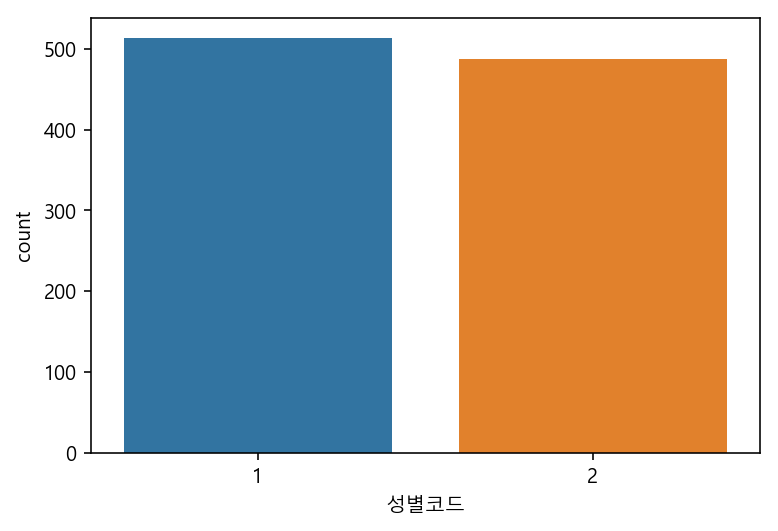

In [145]:
sns.countplot(data=data, x='성별코드')

## 사이즈 조절

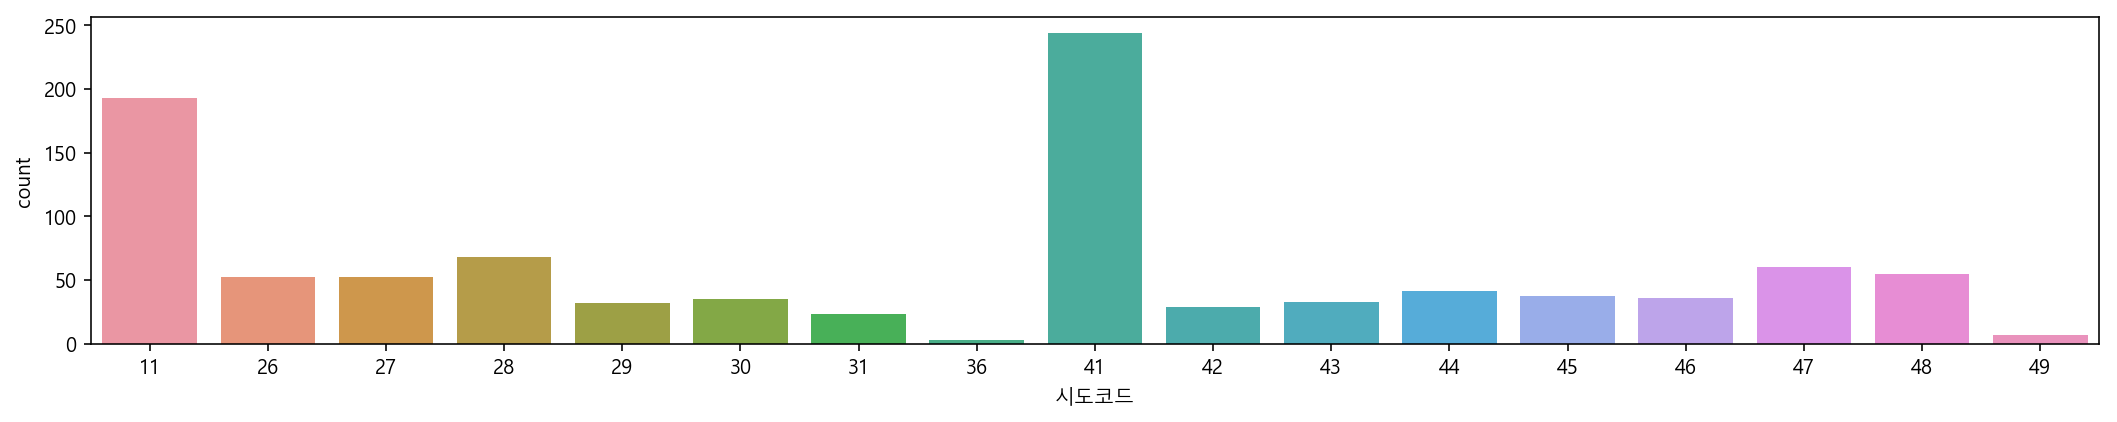

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,3))
sns.countplot(data=data, x='시도코드')

## 여러 개의 시각화 한번에 띄우기

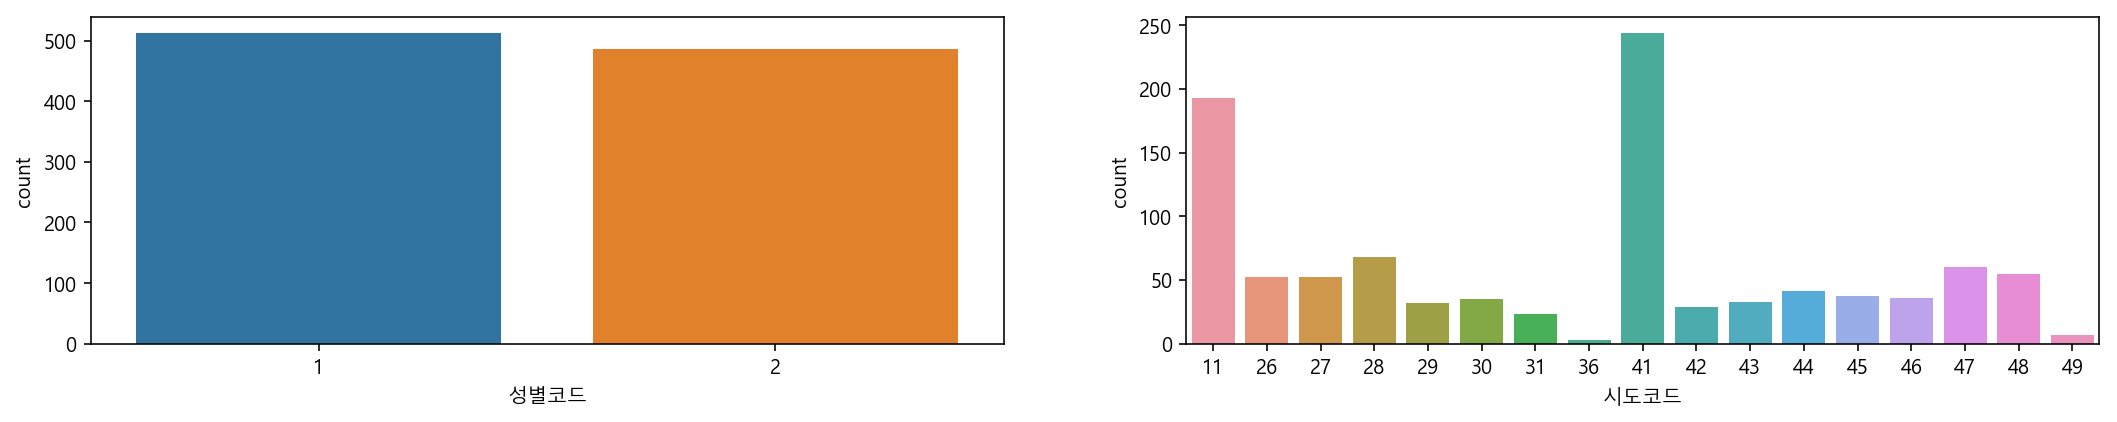

In [147]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18,3)

sns.countplot(data=data, x='성별코드', ax=ax1)
sns.countplot(data=data, x='시도코드', ax=ax2)

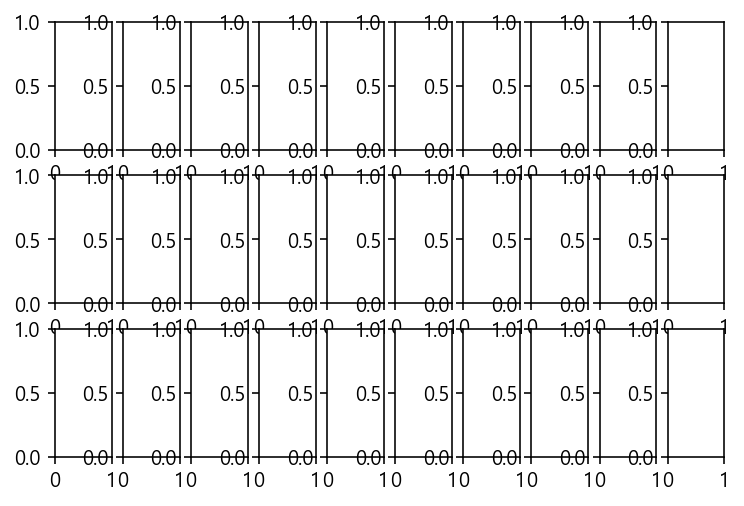

In [148]:
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
# figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure, axes = plt.subplots(nrows=3, ncols=10)

## 컬러 선택하기

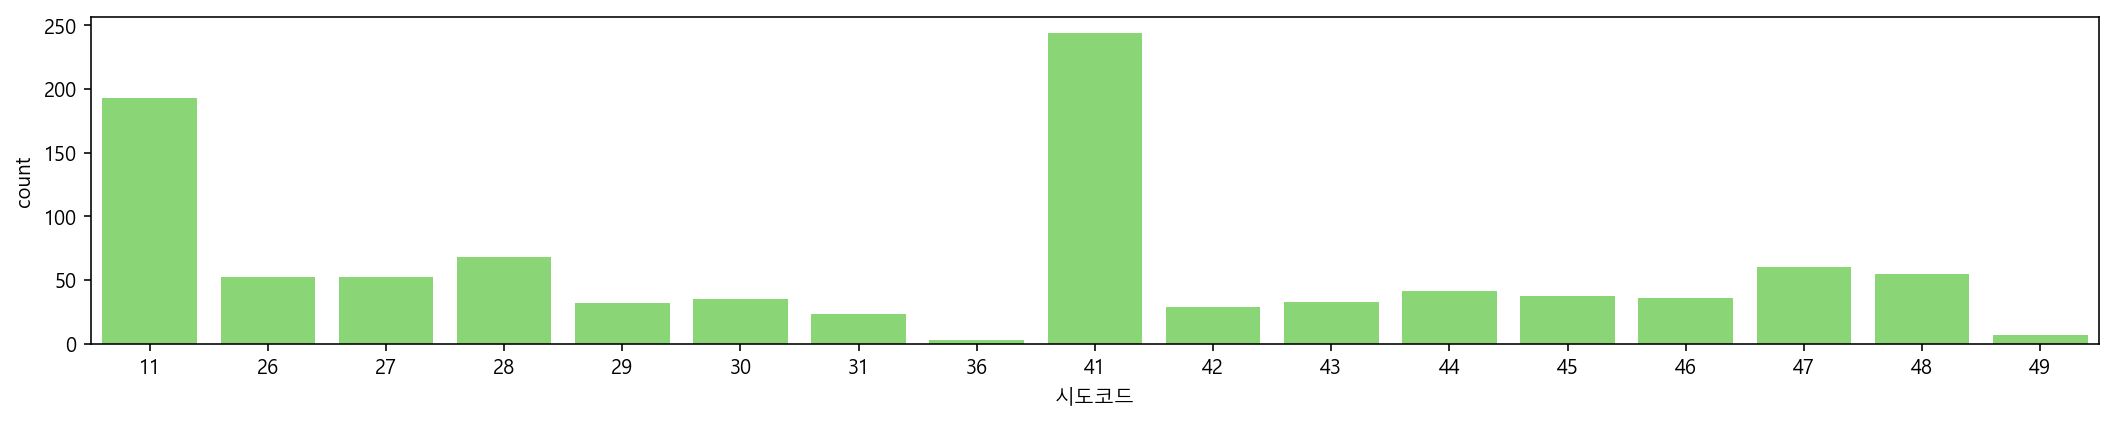

In [149]:
plt.figure(figsize=(18,3))
# sns.countplot(data=data, x='시도코드', color='g')
sns.countplot(data=data, x='시도코드', color='#80e666')

* Kuler adobe color : 컬러 배합 지정

### Color palette

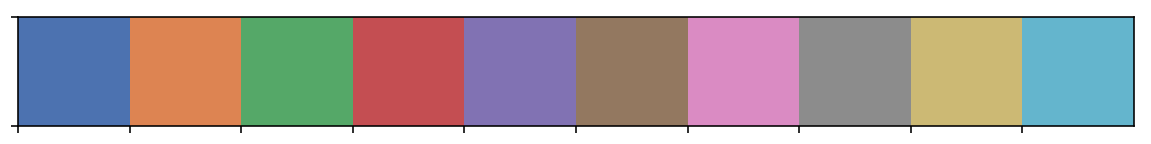

In [150]:
palette = sns.color_palette('deep', 10)
sns.palplot(palette)

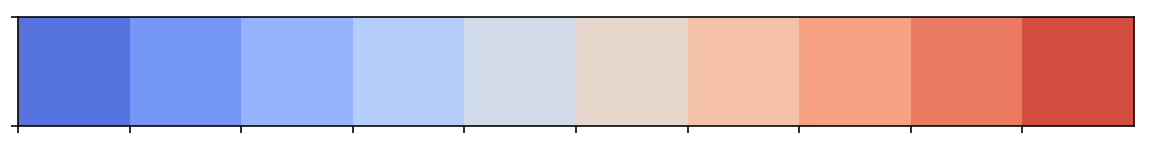

In [151]:
# palette = sns.color_palette('colorblind', 10)
palette = sns.color_palette('coolwarm', 10)
sns.palplot(palette)

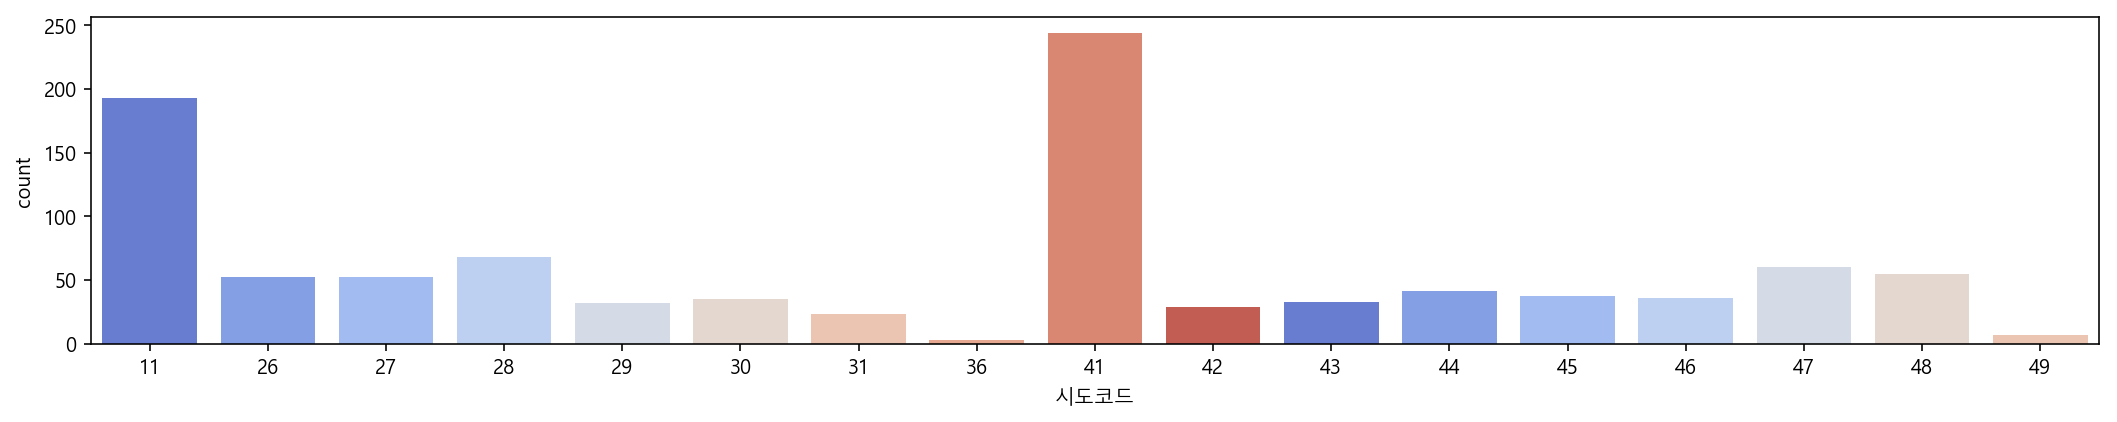

In [152]:
palette = sns.color_palette('coolwarm', 10)

plt.figure(figsize=(18,3))
sns.countplot(data=data, x='시도코드', palette = palette)

## countplot

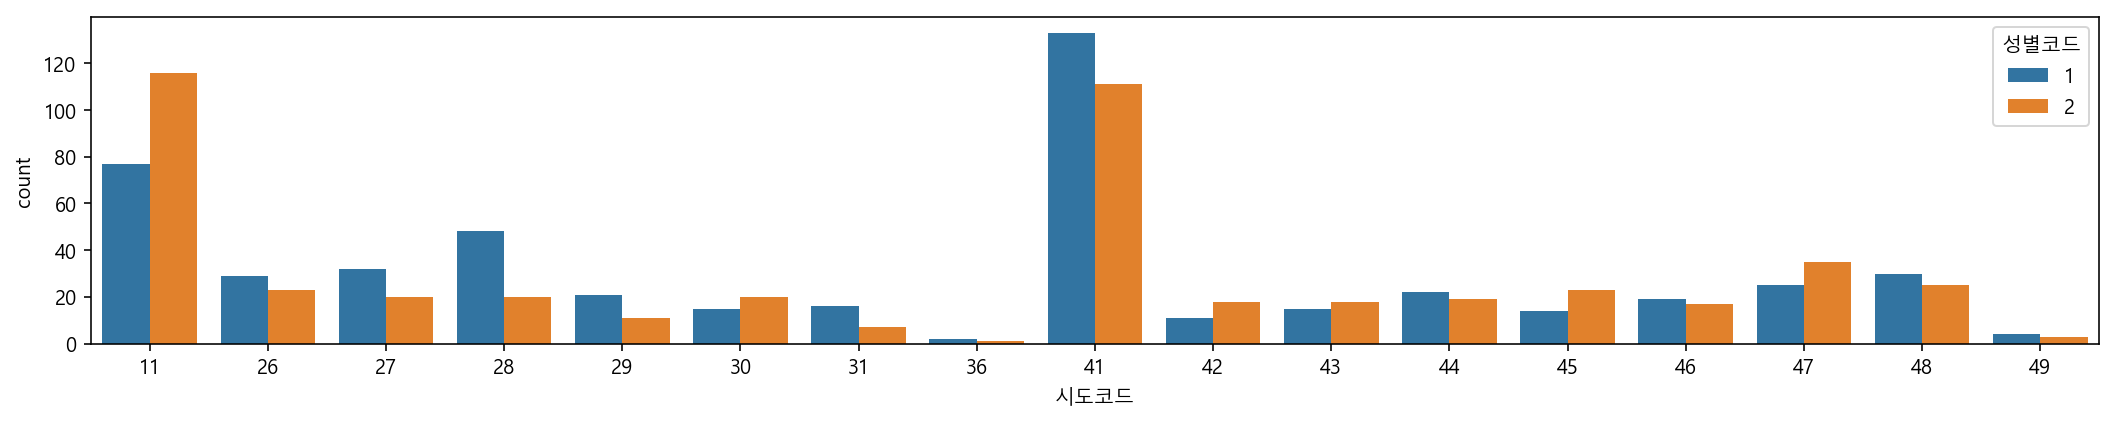

In [153]:
plt.figure(figsize=(18,3))
sns.countplot(data=data, x='시도코드', hue='성별코드')

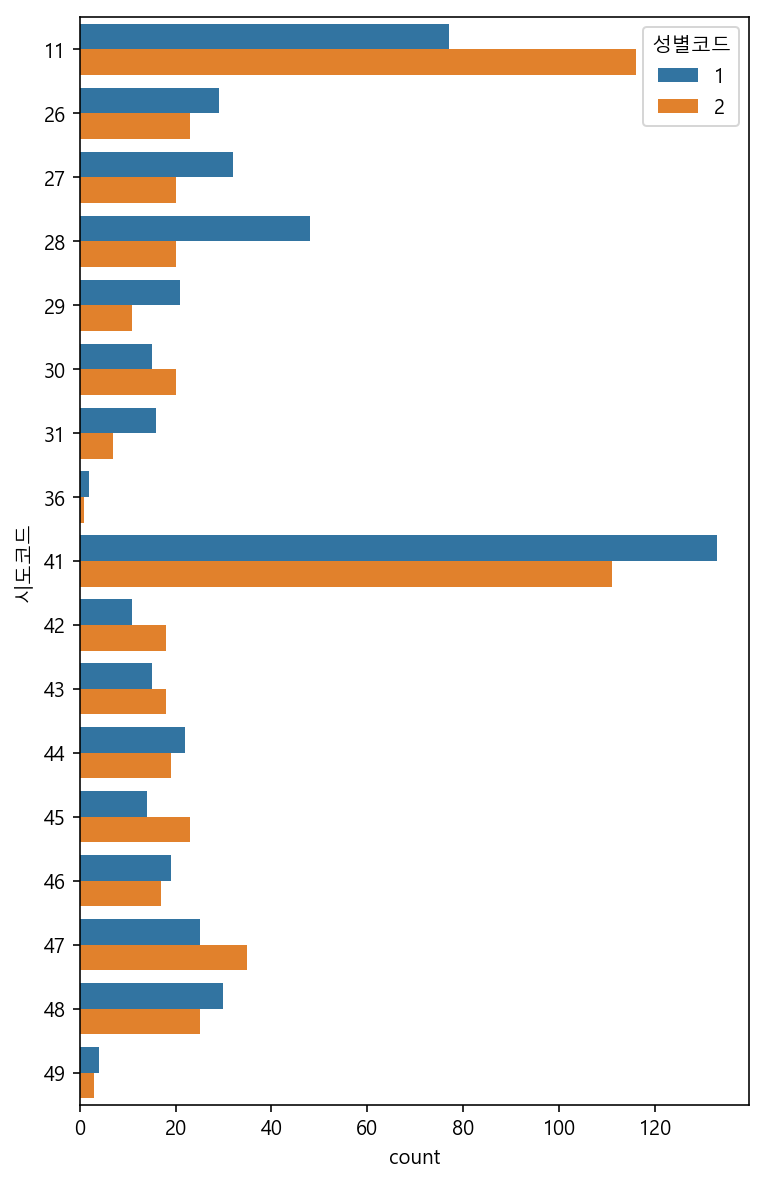

In [154]:
plt.figure(figsize=(6,10))
sns.countplot(data=data, y='시도코드', hue='성별코드')

## distplot

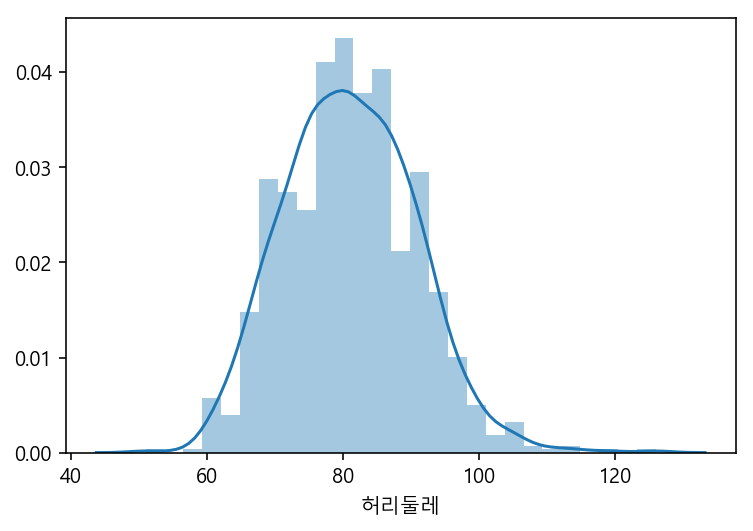

In [155]:
sns.distplot(data['허리둘레'])

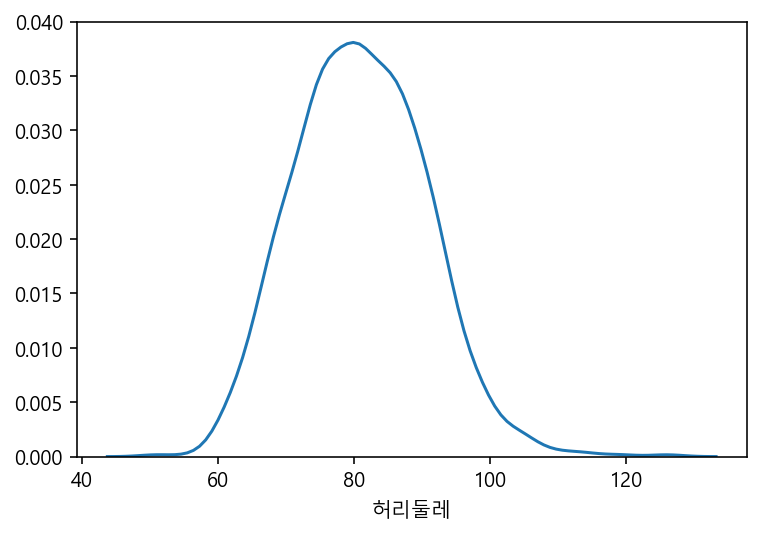

In [156]:
sns.distplot(data['허리둘레'], hist=False)

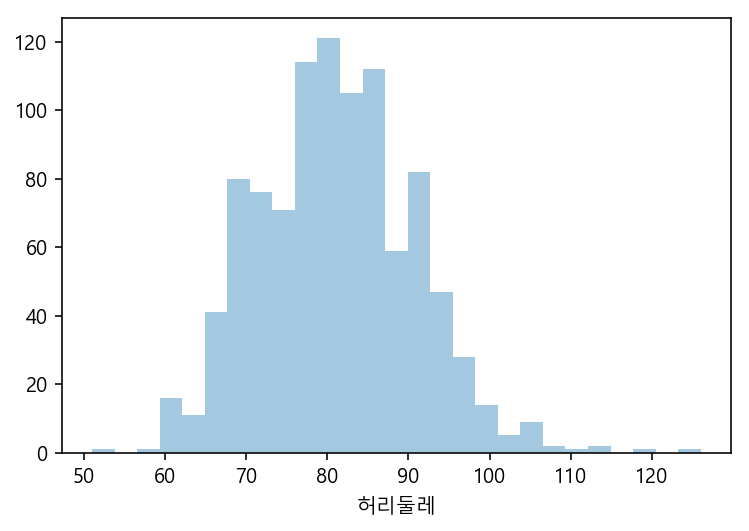

In [157]:
sns.distplot(data['허리둘레'], kde=False)

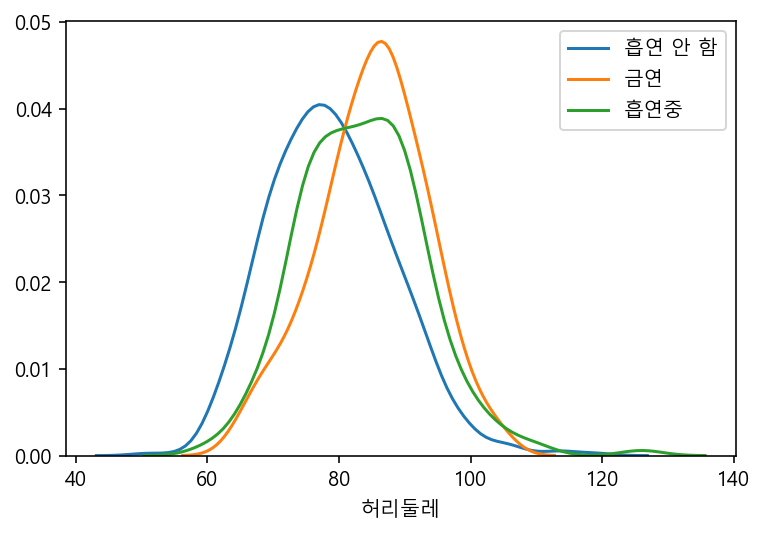

In [158]:
one = data[data['흡연상태']==1]
two = data[data['흡연상태']==2]
three = data[data['흡연상태']==3]

sns.distplot(one['허리둘레'], hist=False, label='흡연 안 함')
sns.distplot(two['허리둘레'], hist=False, label='금연')
sns.distplot(three['허리둘레'], hist=False, label='흡연중')

## barplot
* 검은색 선은 신뢰구간

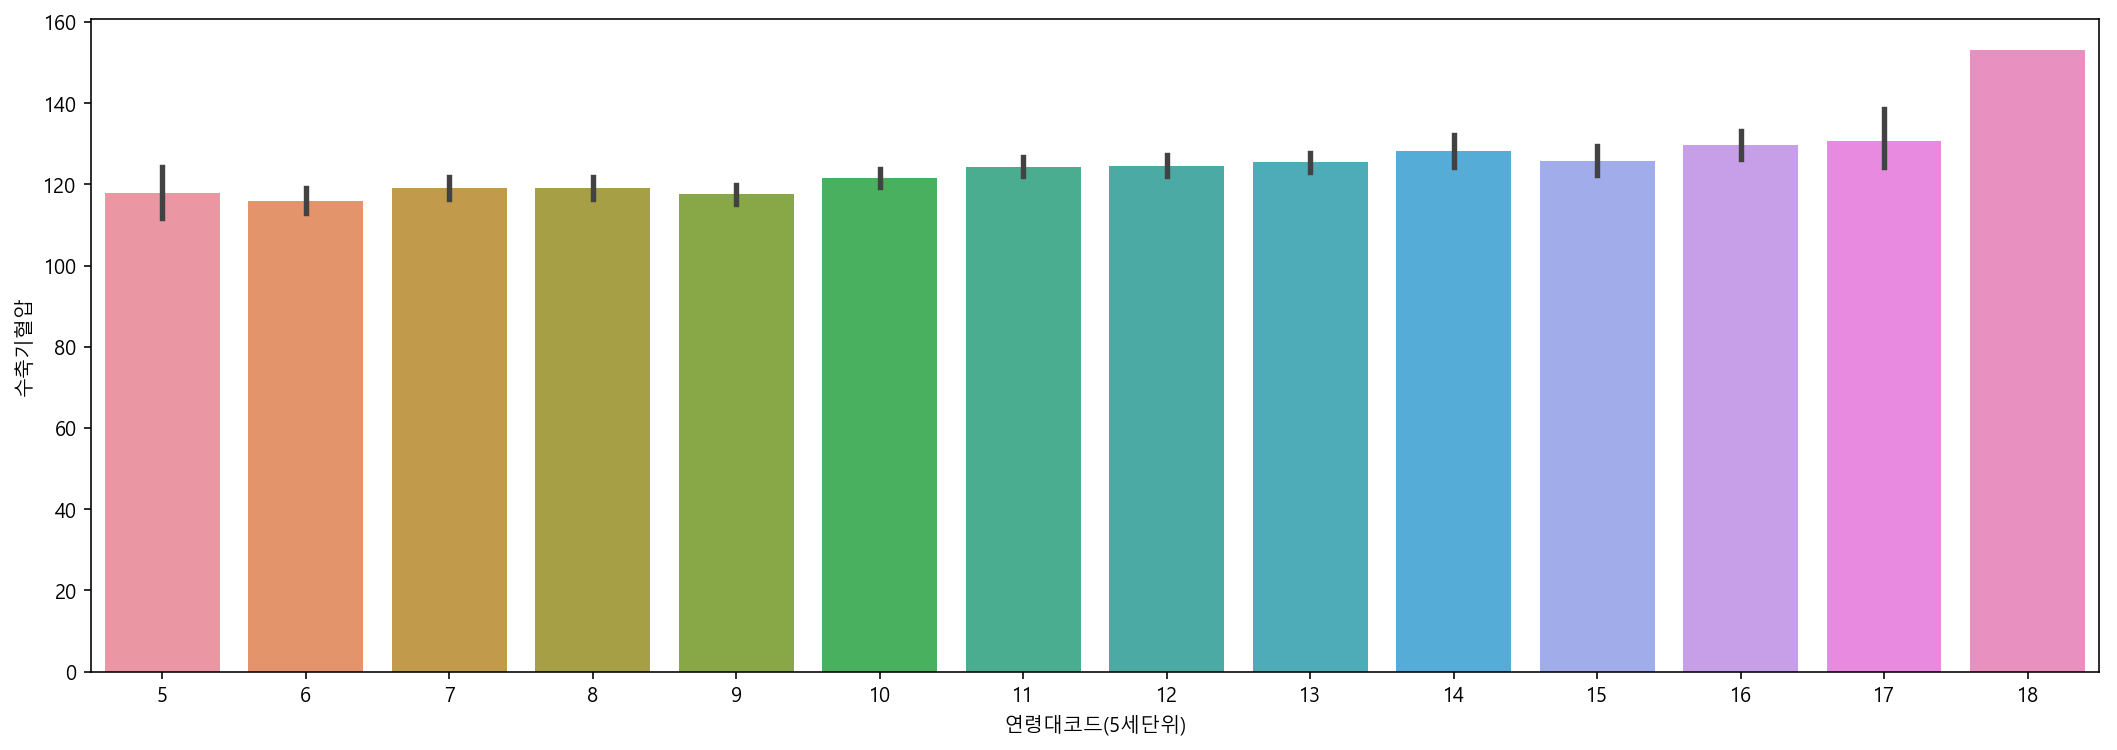

In [159]:
plt.figure(figsize=(18,6))
sns.barplot(data=data, x='연령대코드(5세단위)', y='수축기혈압')

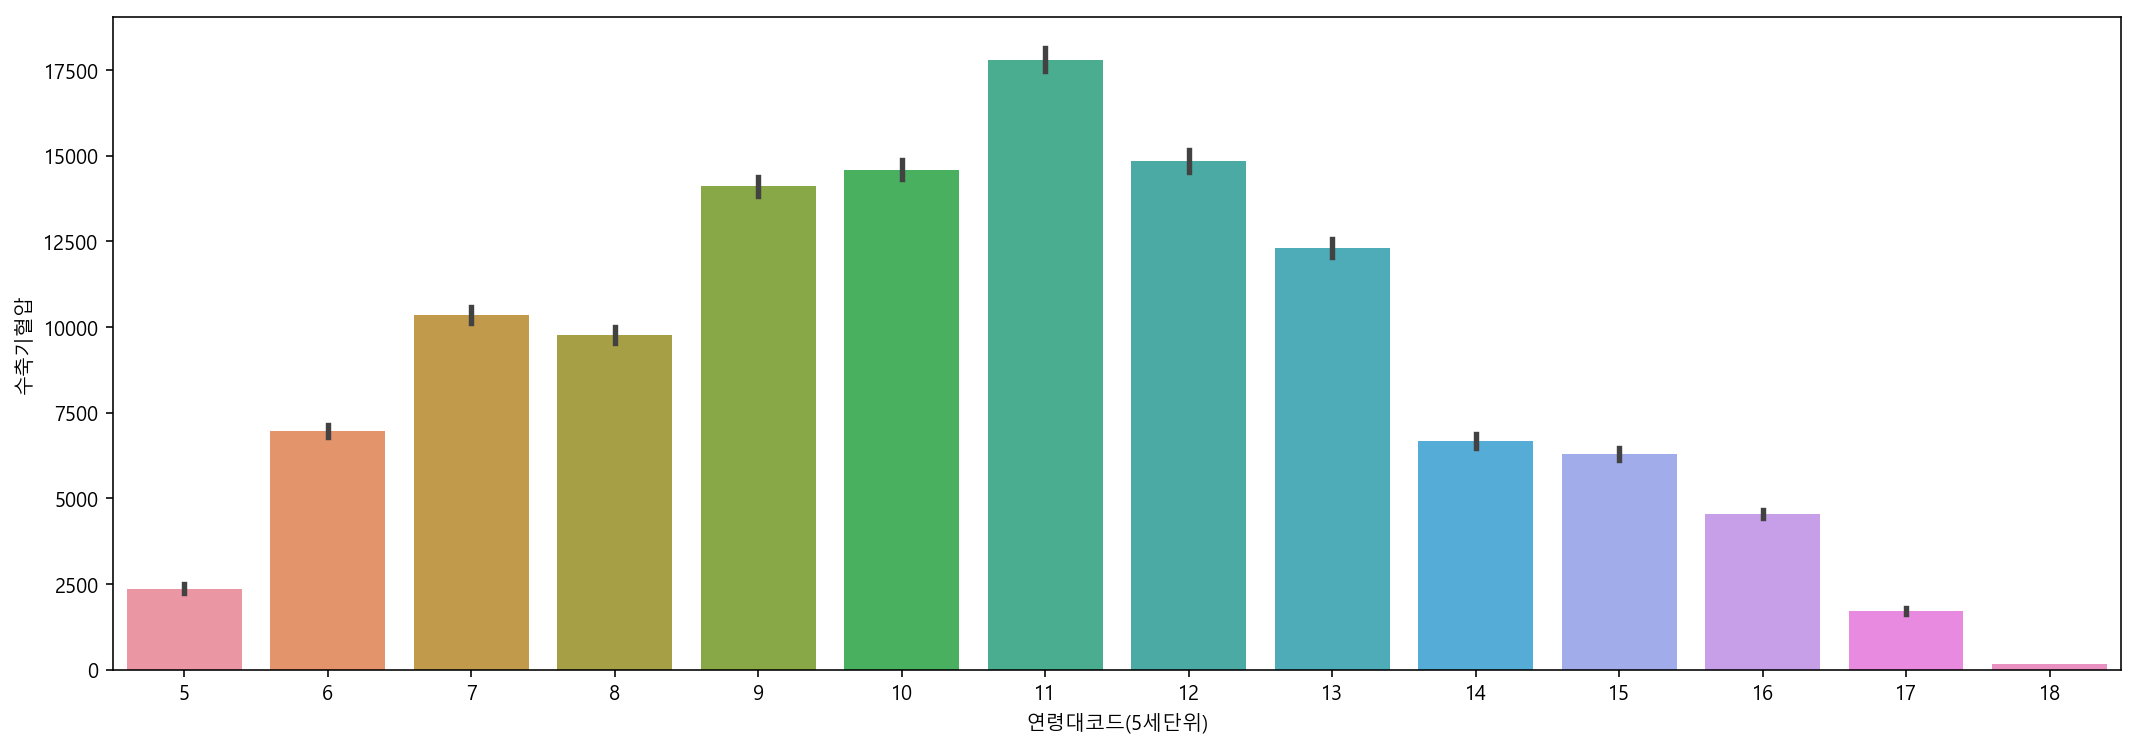

In [160]:
plt.figure(figsize=(18,6))
sns.barplot(data=data, x='연령대코드(5세단위)', y='수축기혈압', estimator=np.sum) # default는 평균

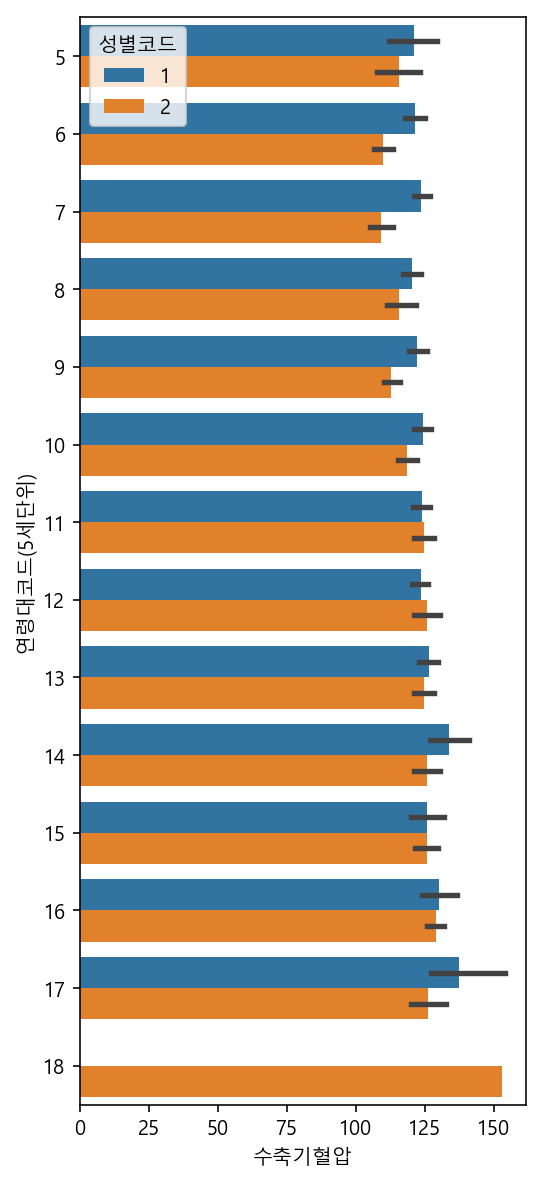

In [161]:
plt.figure(figsize=(4,10))
sns.barplot(data=data, y='연령대코드(5세단위)', x='수축기혈압', hue='성별코드', orient='h') 

## boxplot
* median, Q1, Q3, outlier 표현

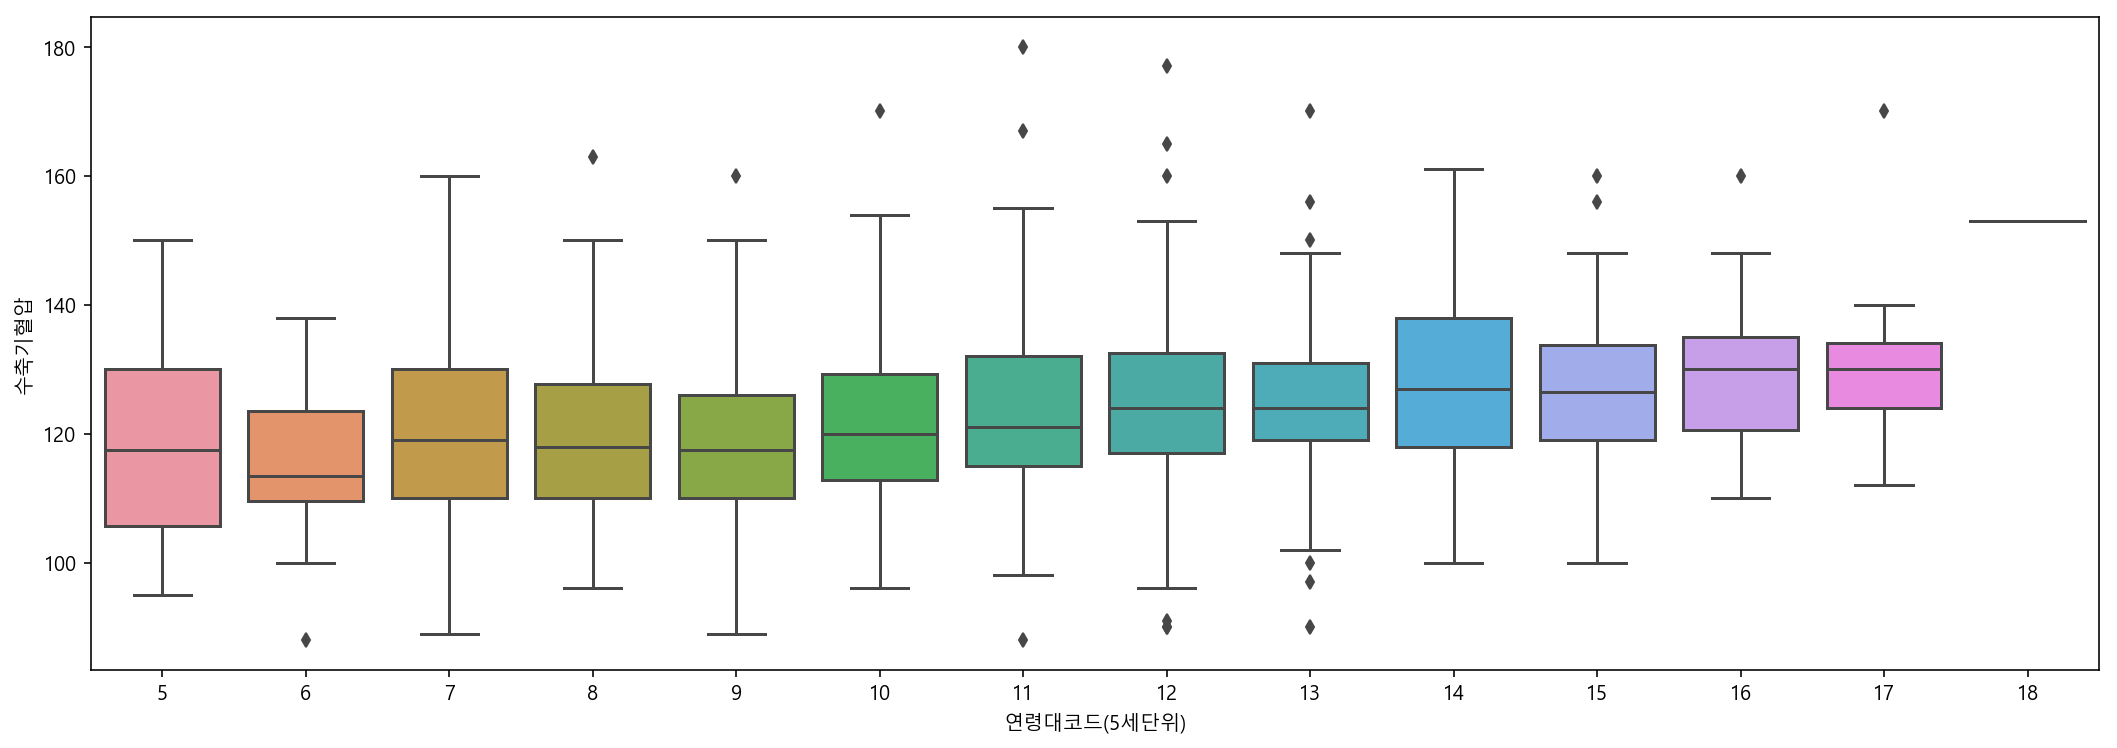

In [162]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data, x='연령대코드(5세단위)', y='수축기혈압')

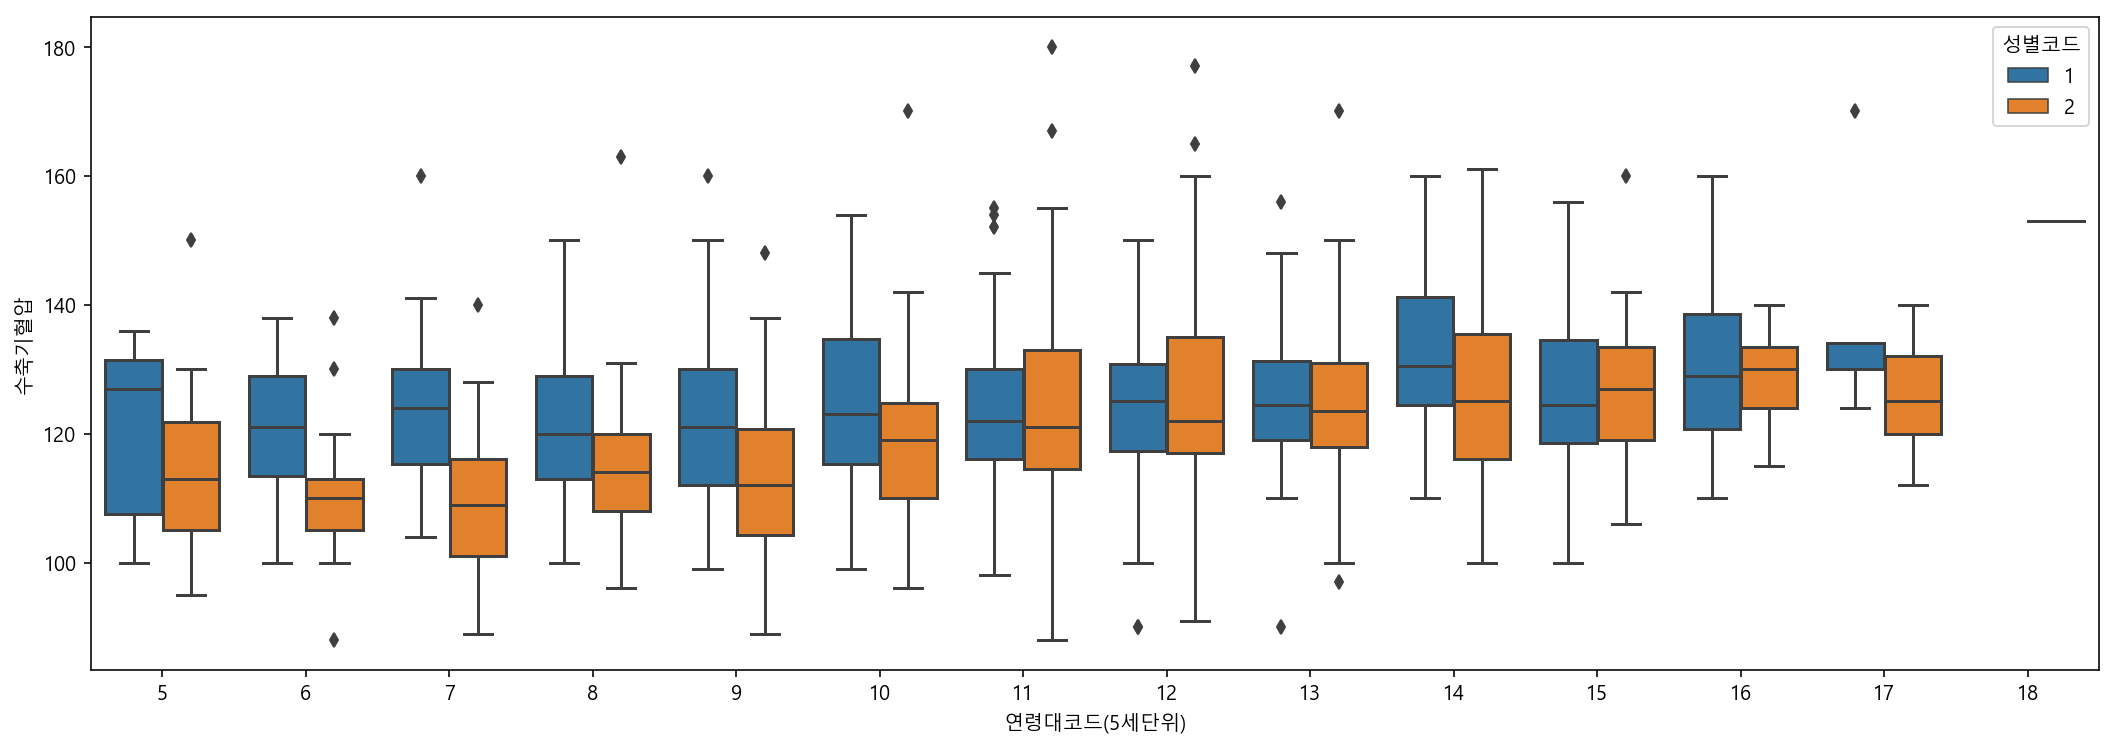

In [163]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data, x='연령대코드(5세단위)', y='수축기혈압', hue='성별코드')

## violinplot

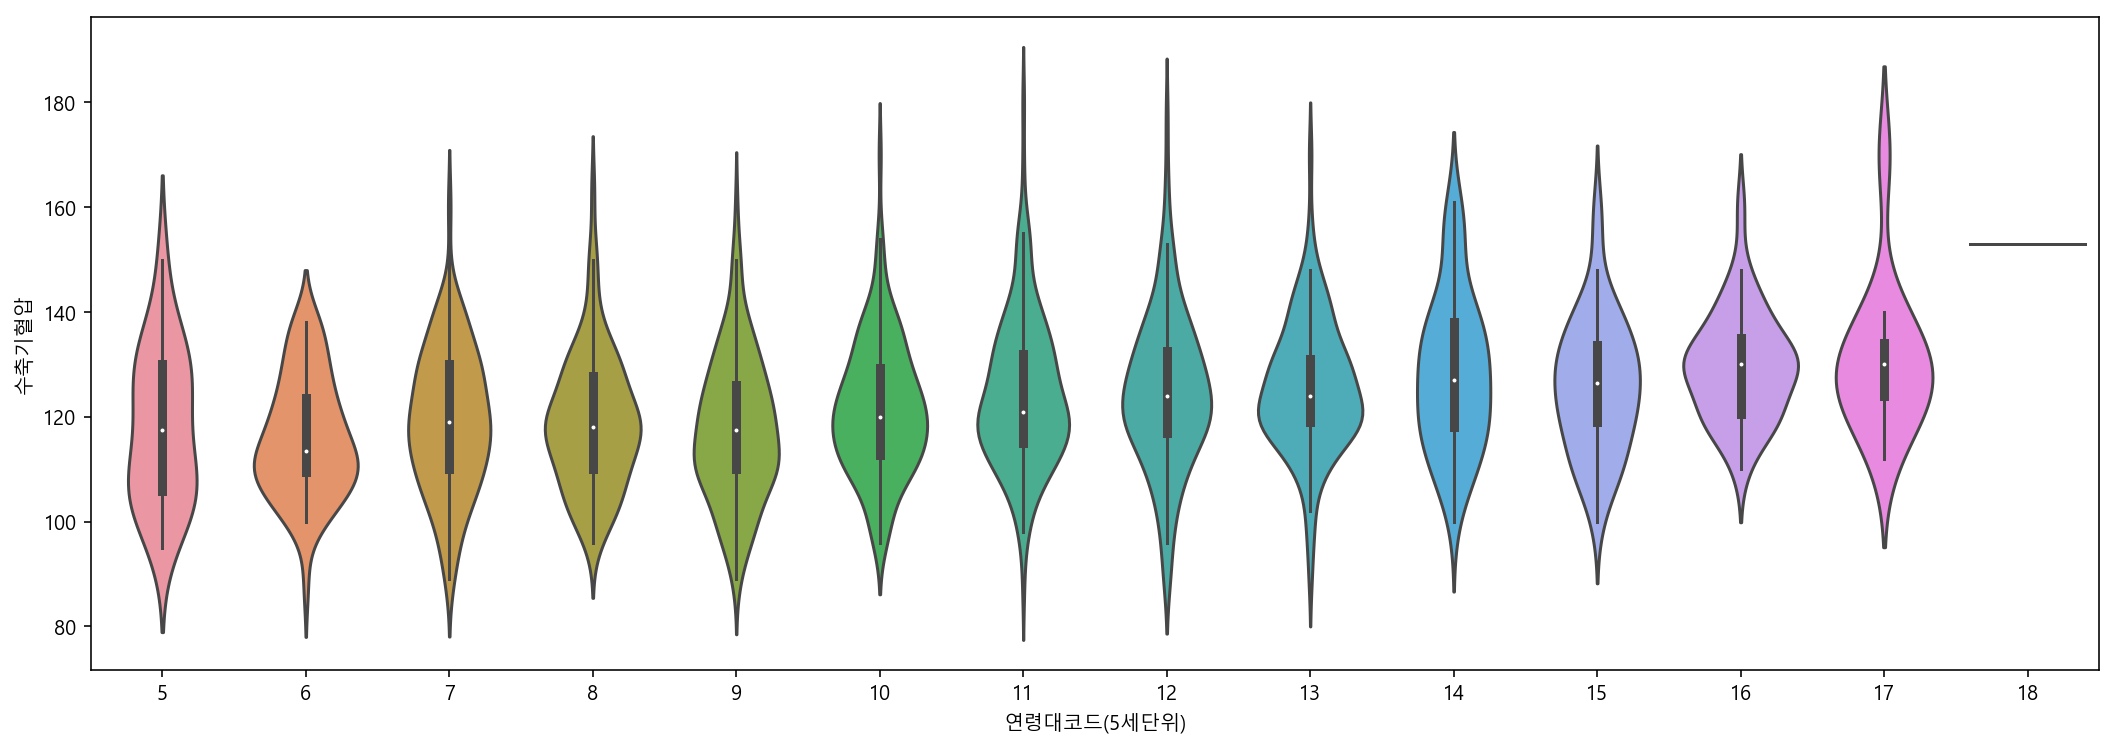

In [164]:
plt.figure(figsize=(18,6))
sns.violinplot(data=data, x='연령대코드(5세단위)', y='수축기혈압')

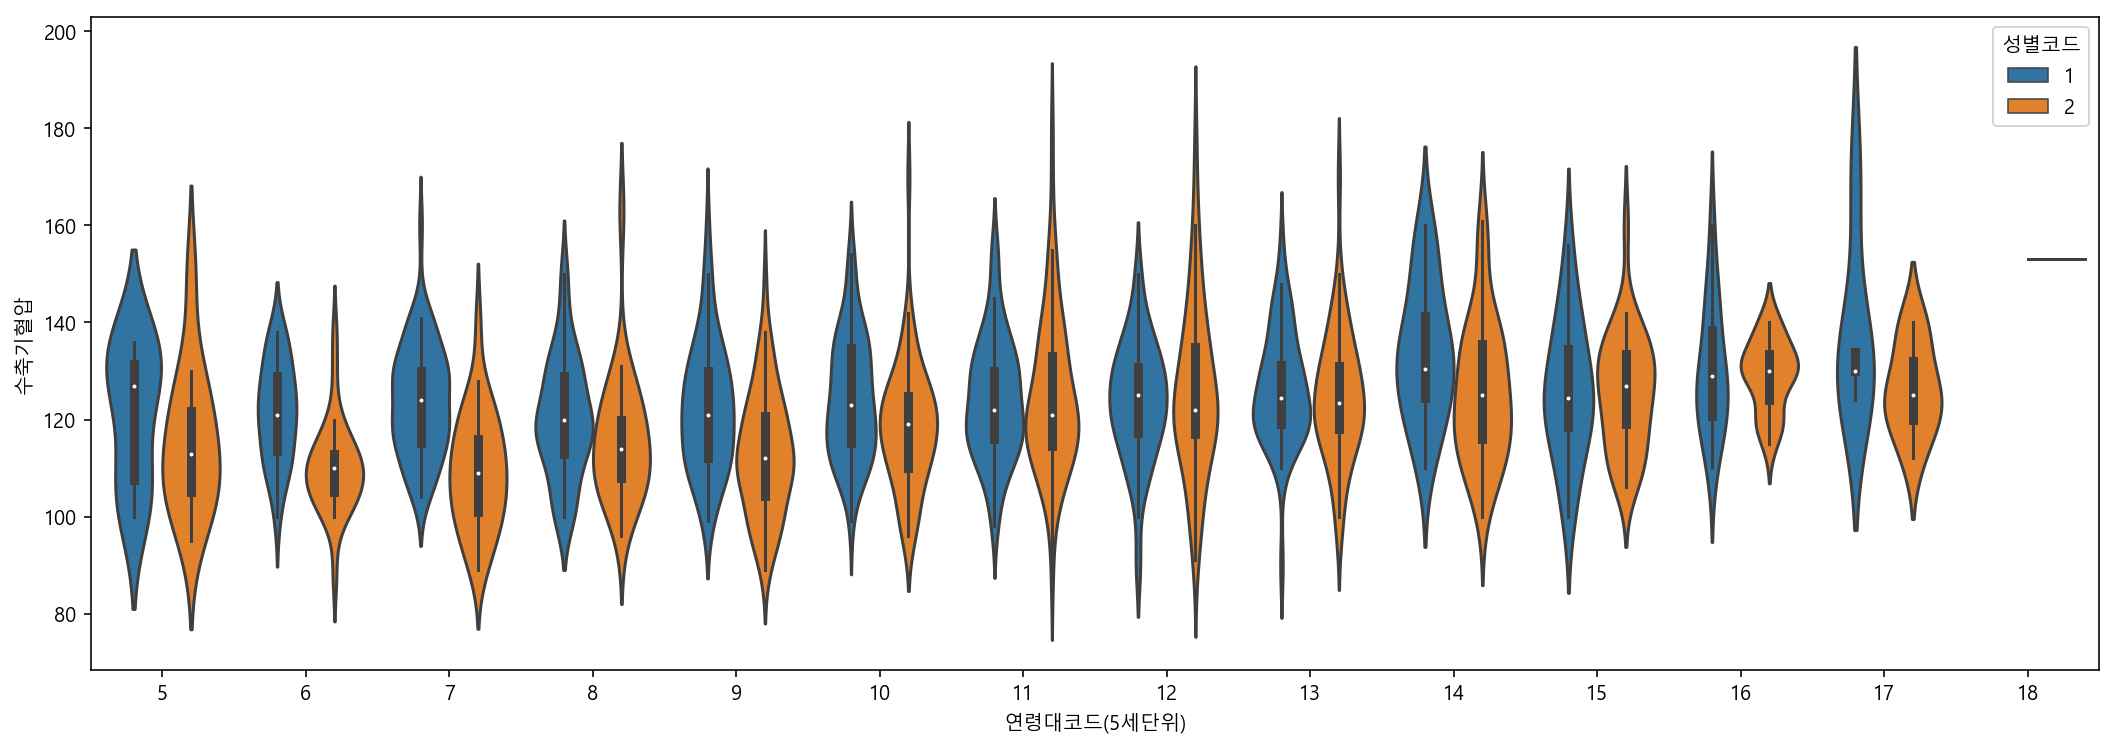

In [165]:
plt.figure(figsize=(18,6))
sns.violinplot(data=data, x='연령대코드(5세단위)', y='수축기혈압', hue='성별코드')

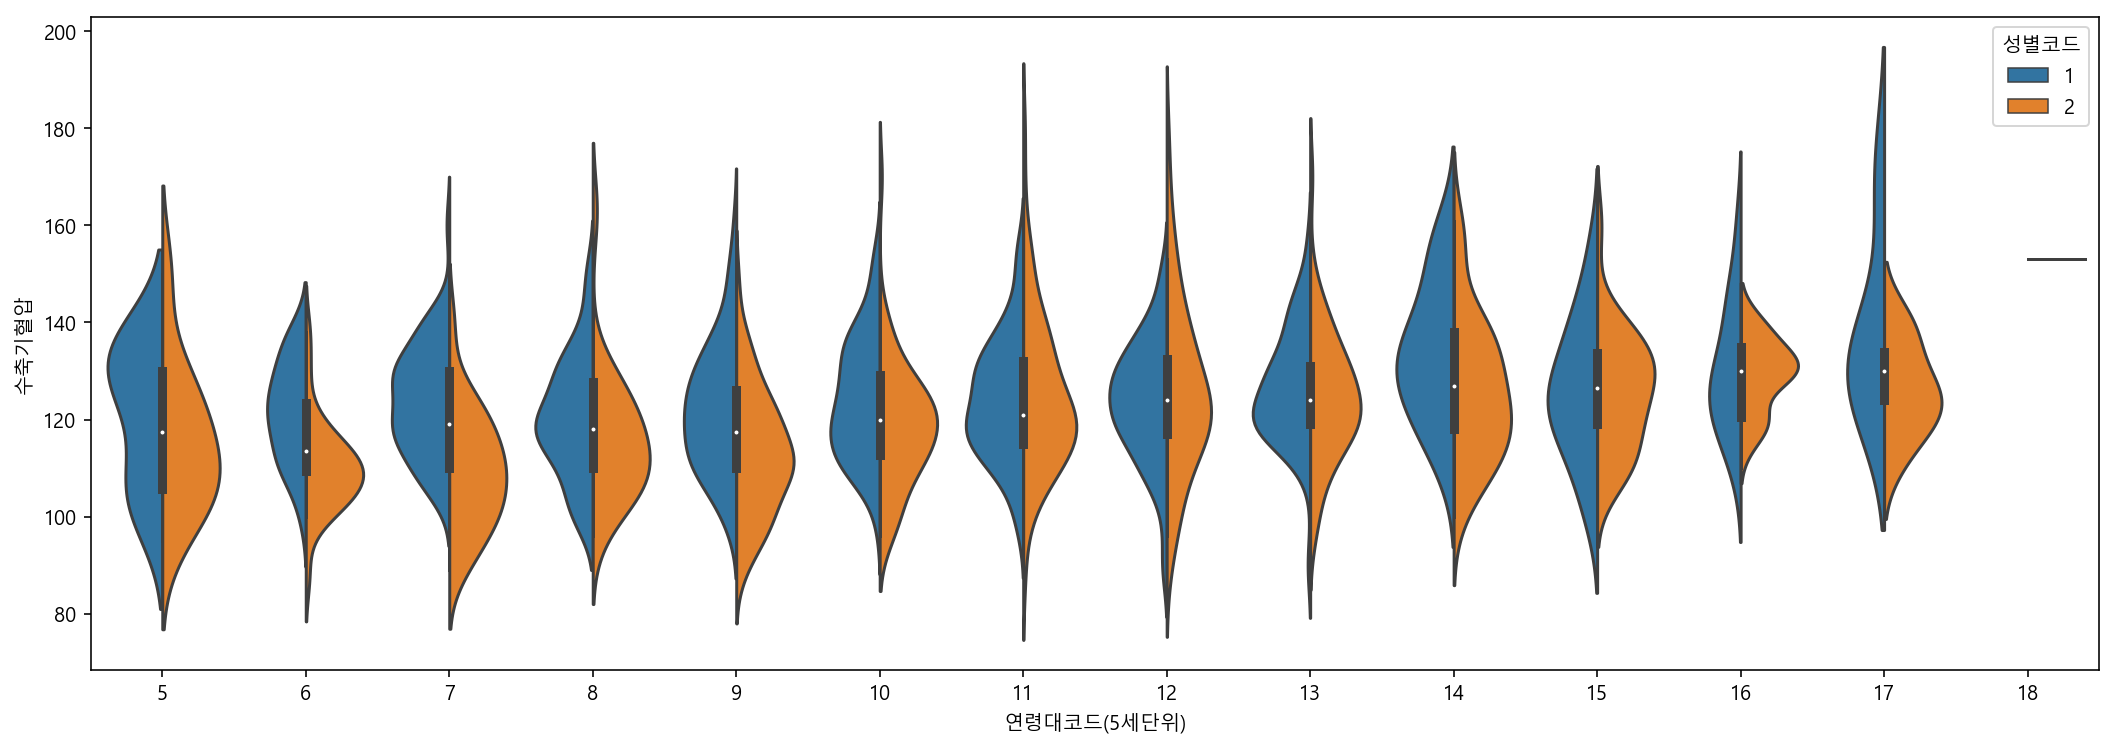

In [166]:
plt.figure(figsize=(18,6))
sns.violinplot(data=data, x='연령대코드(5세단위)', y='수축기혈압', hue='성별코드', split=True)

## pointplot
* x축이 서로 연관성이 없을 경우 - barplot
* x축이 서로 연관성(특히 순서)이 있을 경우 - pointplot

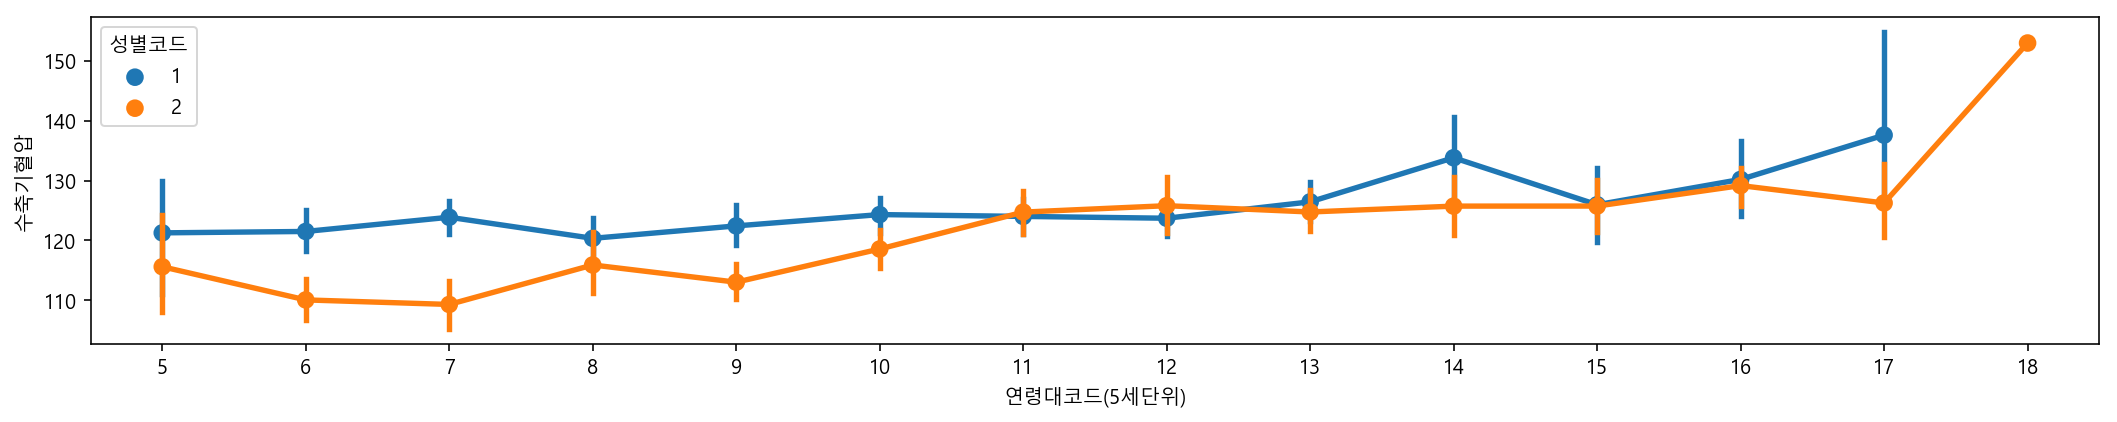

In [168]:
plt.figure(figsize=(18,3))
sns.pointplot(data=data, x='연령대코드(5세단위)', y='수축기혈압', hue='성별코드')

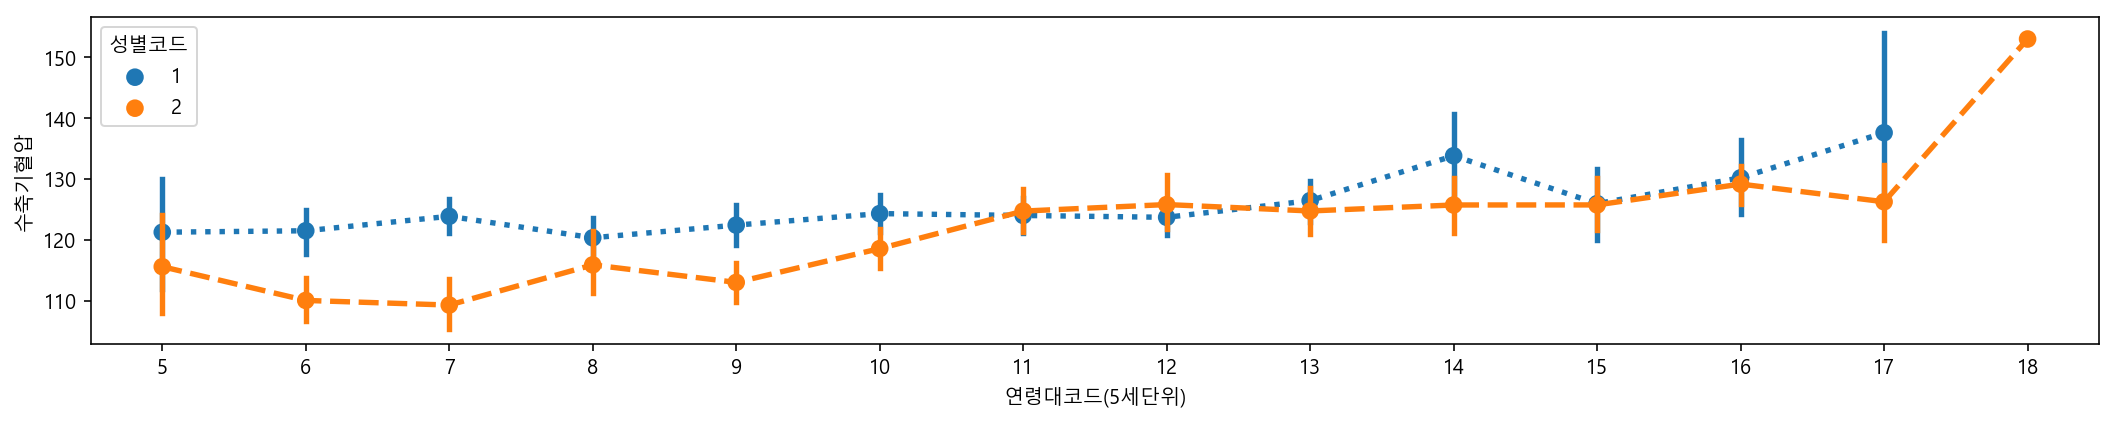

In [170]:
# lintstyles
plt.figure(figsize=(18,3))
sns.pointplot(data=data, x='연령대코드(5세단위)', y='수축기혈압', hue='성별코드', linestyles=[':','--'])

## scatterplot
* 두 변수간의 상관관계 확인, outlier 확인
* 장점은 정보량을 많이 넣을 수 있다.

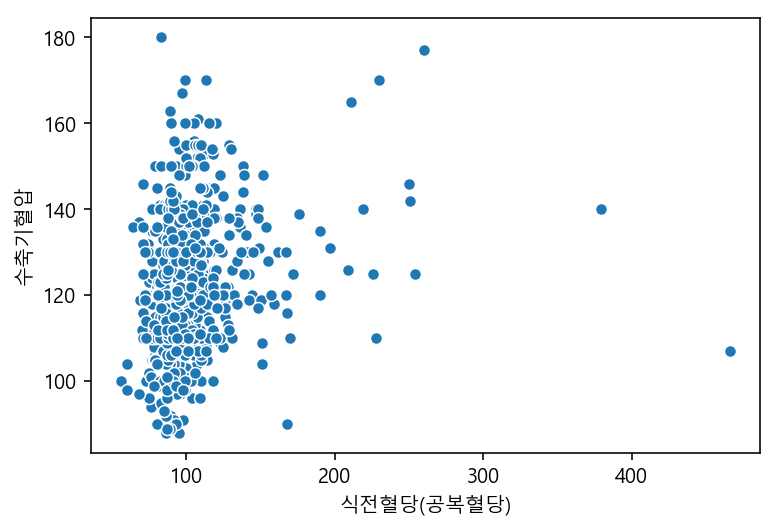

In [171]:
sns.scatterplot(data=data, x='식전혈당(공복혈당)', y='수축기혈압')

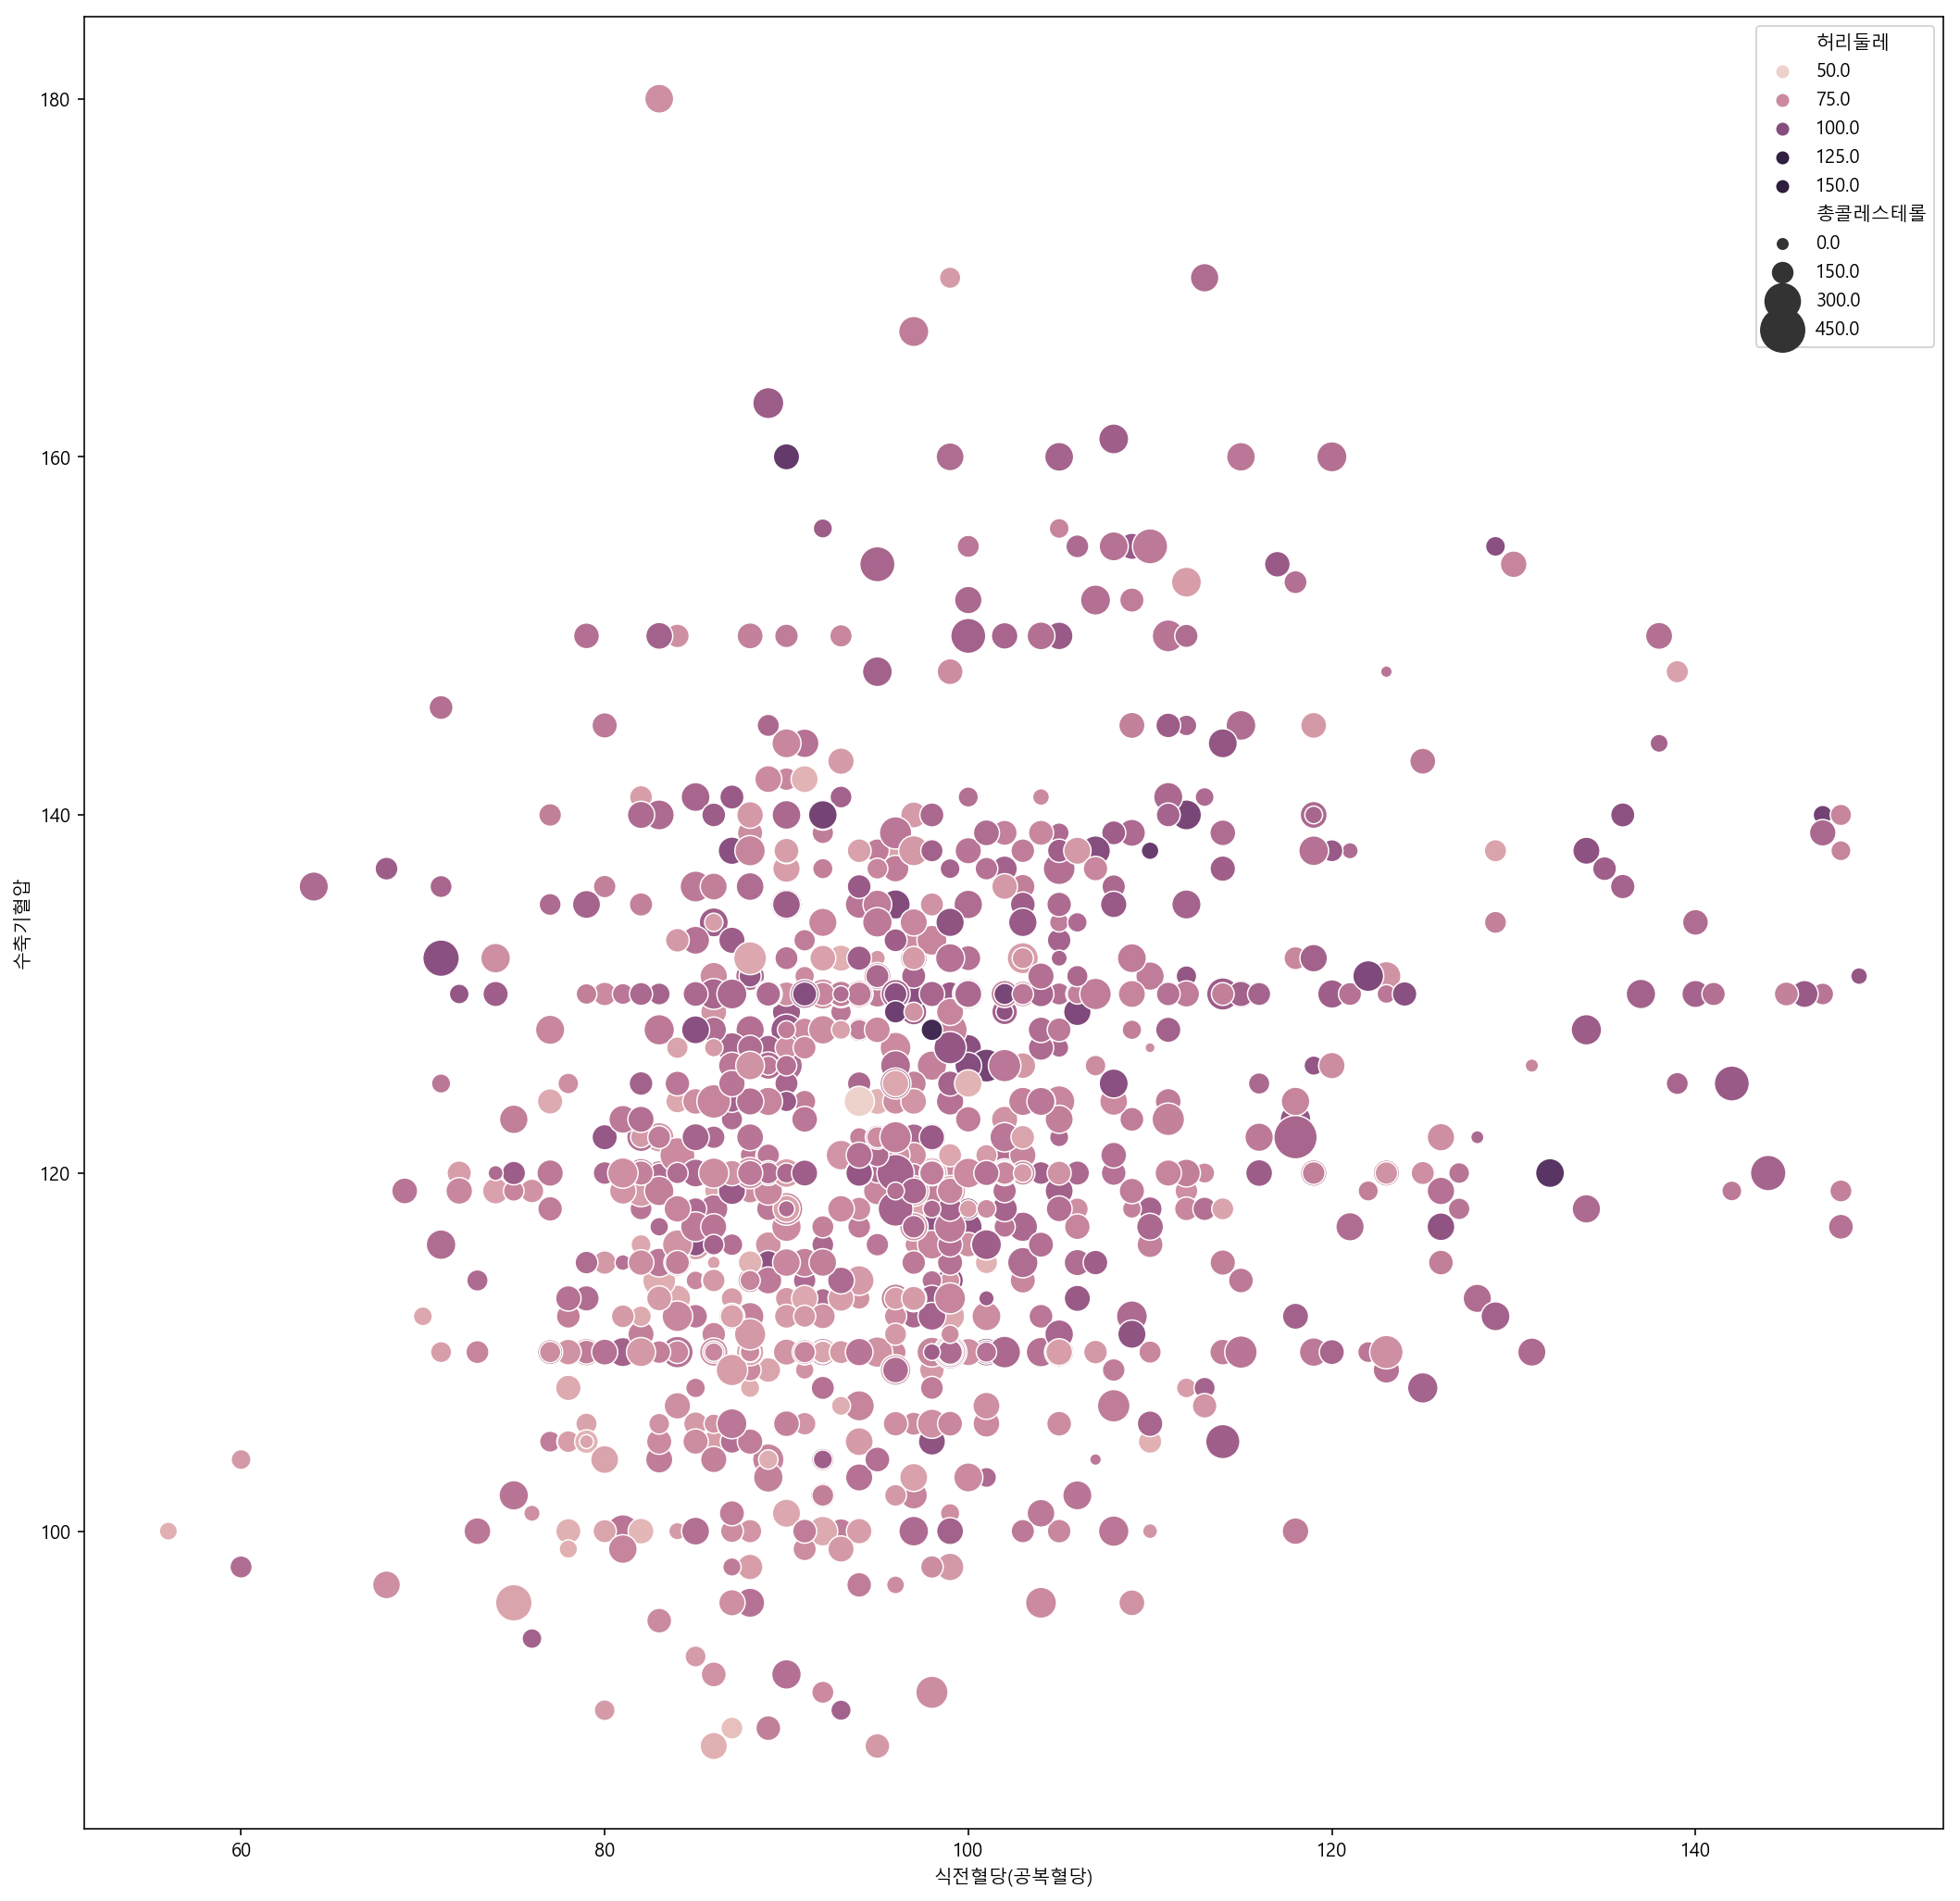

In [176]:
plt.figure(figsize=(18,18))
target = data[data['식전혈당(공복혈당)'] < 150]
sns.scatterplot(data=target, x='식전혈당(공복혈당)', y='수축기혈압', hue='허리둘레', size='총콜레스테롤', sizes=(30, 550))